# Analize results

In [1]:
import supportFiles.myFunc as myF
import pandas as pd
import numpy as np
import math
import os
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Make graphs

In [2]:
filepath = "./dissertation/"

In [3]:
temp = []

# Load files of pcapType and datasetType no more than maxNumFiles
files = [s for s in os.listdir(filepath) if ("fscore_b_SCAN" in s and "CIC_us.csv" in s)] # "CIC.csv" in s)]
for file in files:
    temp.append(pd.read_csv(filepath+file, sep=','))
    temp[-1]["origin"] = file.split("_")[3]
data = pd.concat(temp, names=["lero"], ignore_index=True)
if "Unnamed: 0" in data.columns:
    data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Data Set,DT TN,DT FP,DT FN,DT TP,LR TN,LR FP,LR FN,LR TP,MLP TN,...,NB TP,SVM TN,SVM FP,SVM FN,SVM TP,XGB TN,XGB FP,XGB FN,XGB TP,origin
0,SCAN_NB15_CIC,391,36284,1,400,29573,7102,401,0,10558,...,93,22219,14456,319,82,2589,34086,0,401,AB-TRAP
1,SCAN_CIC-IDS_CIC,722593,1548529,158621,183,980224,1290898,929,157875,1377696,...,157448,1210889,1060233,438,158366,696875,1574247,80037,78767,AB-TRAP
2,SCAN_ToN-IoT_CIC,1797328,716731,4977,31228,2514059,0,36205,0,2142550,...,0,2514059,0,36205,0,538000,1976059,10905,25300,AB-TRAP
3,SCAN_BoT-IoT_CIC,72679,16555,2379522,1133888,39226,50008,1655980,1857430,42320,...,818968,38824,50410,1559589,1953821,55020,34214,1934734,1578676,AB-TRAP
4,SCAN_internet_CIC,9105696,26657,79228,6308,9062024,70329,85533,3,9089964,...,80797,9087836,44517,85536,0,9106782,25571,80539,4997,AB-TRAP
5,SCAN_AB-TRAP_CIC,6406346,2726007,87214,74809,4778761,4353592,150953,11070,1970568,...,665,8392161,740192,155605,6418,8810960,321393,161177,846,BoT-IoT
6,SCAN_NB15_CIC,26176,10499,400,1,22486,14189,152,249,34429,...,249,34697,1978,259,142,36411,264,401,0,BoT-IoT
7,SCAN_CIC-IDS_CIC,1815973,455149,82368,76436,1706149,564973,157740,1064,1604417,...,176,1680605,590517,157315,1489,2097611,173511,124049,34755,BoT-IoT
8,SCAN_ToN-IoT_CIC,2225701,288358,24457,11748,0,2514059,0,36205,0,...,0,0,2514059,0,36205,2485615,28444,31229,4976,BoT-IoT
9,SCAN_internet_CIC,6406346,2726007,54325,31211,4778761,4353592,62672,22864,1970568,...,33403,8392161,740192,83801,1735,8810960,321393,84258,1278,BoT-IoT


In [4]:
#setInfo = pd.DataFrame(index=myF.datasetOptions().values())
data.rename(columns={'Data Set':'target'}, inplace=True)
#data.set_index('target', inplace=True)
setInfo = pd.DataFrame(data={'name':['AB-TRAP', 'NB15', 'CIC-IDS', 'ToN-IoT', 'BoT-IoT', 'internet'],
                             'scan':[162023,401, 158804, 36205, 3513410, 85536],
                             'benign':[9132353, 36675, 2271122, 2514059, 89234, 9132353],
                             'total':[9294376,  38987, 2827677, 5350583, 13427569, 9217889]})
setInfo.set_index('name',inplace=True)
setInfo['scan_ratio'] = setInfo.apply(lambda x: 100*x['scan']/(x['scan']+x['benign']), axis=1)
setInfo
#data={'AB-TRAP':[162023, 9132353, 9294376], 'NB15':[401, 36675, 38987], 'CIC-IDS':[158804, 2271122, 2827677],'ToN-IoT':[36205, 2514059, 5350583], 'BoT-IoT':[3513410, 89234, 13427569], 'internet':[85536, 9132353, 9217889]},

,scan,benign,total,scan_ratio
name,,,,
AB-TRAP,162023,9132353,9294376,1.743237
NB15,401,36675,38987,1.081562
CIC-IDS,158804,2271122,2827677,6.535343
ToN-IoT,36205,2514059,5350583,1.419657
BoT-IoT,3513410,89234,13427569,97.523097
internet,85536,9132353,9217889,0.927935


In [5]:
sorter = setInfo.sort_values('scan_ratio').index.values
data.origin = data.origin.astype("category")
data.origin.cat.set_categories(sorter, inplace=True)
data.sort_values(["origin"], inplace=True)

### Graphs MCC per ML and target

<ipython-input-6-5c7fb7aa1cce>:31: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: ( (x[c[0]]/x[c[4]]) - x[c[5]]*x[c[6]]) / math.sqrt( x[c[5]] * x[c[6]] * ( 1 - x[c[5]] ) * ( 1 - x[c[6]]) )


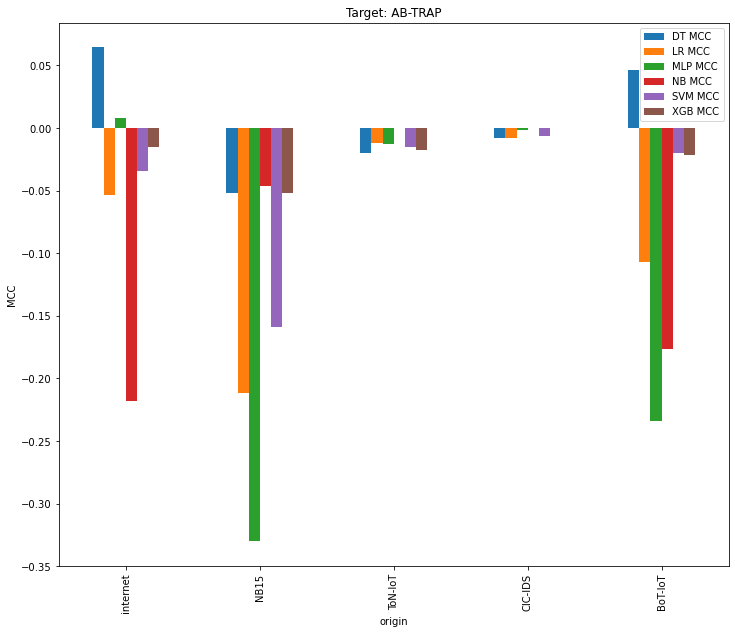

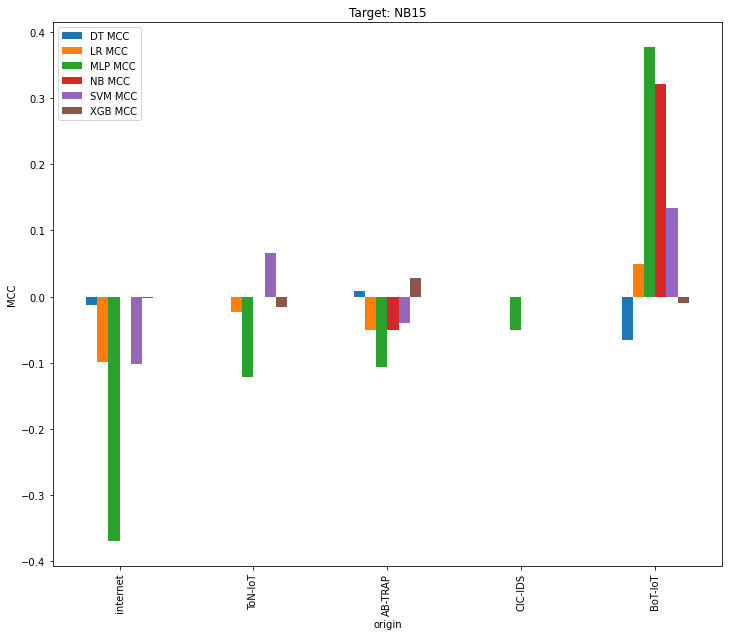

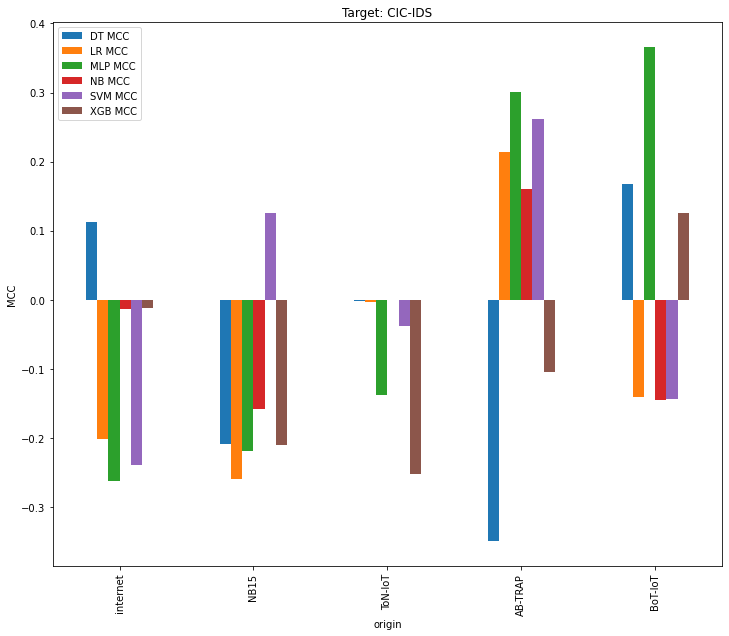

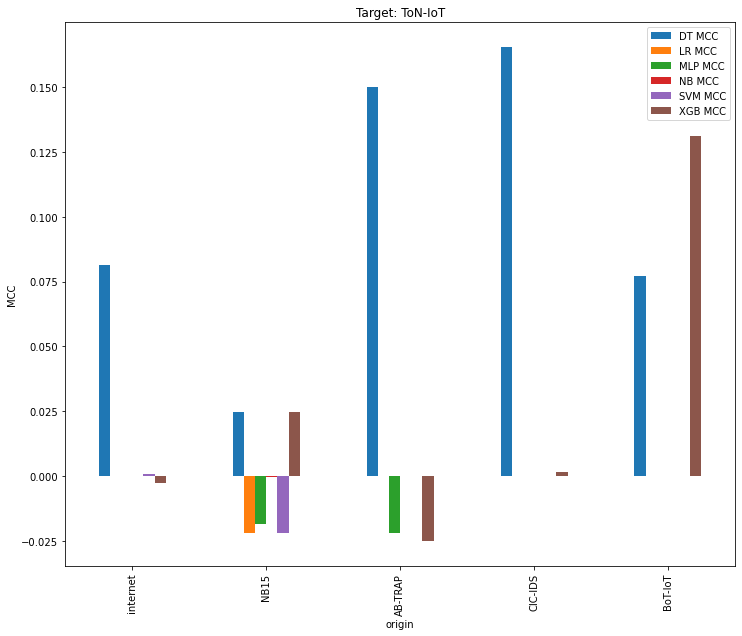

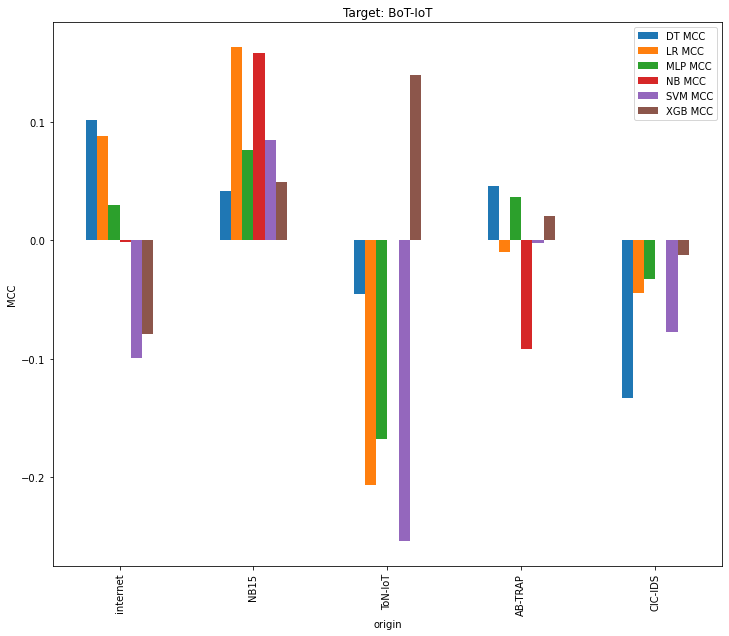

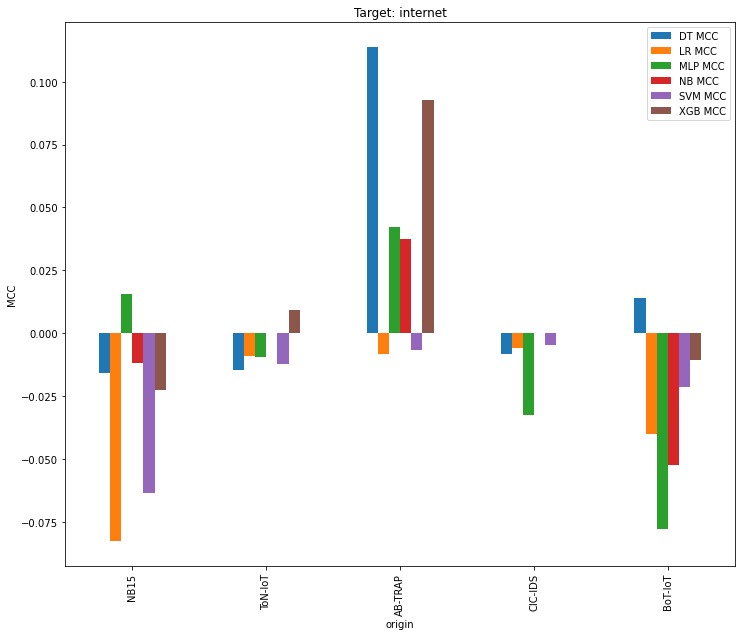

In [6]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
all_names = "{0} TP;{0} FP;{0} TN;{0} FN;{0} T;{0} S;{0} P;{0} MCC"
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
   # g1["{0} MCC".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FP".format(MLname), "{0} TN".format(MLname), "{0} FN".format(MLname)]].apply( 
   #     lambda x: (x["{0} TP".format(MLname)] * x["{0} TN".format(MLname)] - x["{0} FP".format(MLname)] * x["{0} FN".format(MLname)])
   #     / math.sqrt(x["{0} TP".format(MLname)] + x["{0} FP".format(MLname)] 
   #        * (x["{0} TP".format(MLname)] + x["{0} FN".format(MLname)])
   #        * (x["{0} TN".format(MLname)] + x["{0} FP".format(MLname)])
   #        * (x["{0} TN".format(MLname)] + x["{0} FN".format(MLname)]) ), axis=1)

    c = all_names.format(MLname).split(";")
    # 0 - TP      1 - FP     2 - TN     3 - FN     4 - T     5 - S     6 - P     7 - MCC
 
    g1[c[4]] = g1[ c[0:4] ].apply(
        lambda x: x[c[0]] + x[c[1]] + x[c[2]] + x[c[3]]
    , axis=1)
    
    g1[c[5]] = g1[[ c[0], c[3], c[4] ]].apply(
        lambda x: (x[c[0]] + x[c[3]]) / x[c[4]]
    , axis=1)
    
    g1[c[6]] = g1[[ c[0], c[1], c[4] ]].apply(
        lambda x: (x[c[0]] + x[c[1]]) / x[c[4]]
    , axis=1)
    
    g1[c[7]] = g1[[ c[0], c[4], c[5], c[6] ]].apply(
        lambda x: ( (x[c[0]]/x[c[4]]) - x[c[5]]*x[c[6]]) / math.sqrt( x[c[5]] * x[c[6]] * ( 1 - x[c[5]] ) * ( 1 - x[c[6]]) ) 
    , axis=1)
   
    
    #g1.fillna(value={c[7]:0, c[6]:0, c[5]:0}, inplace=True)
    #cols = list(range(1+x,5+x))
    #cols.extend([g1.shape[1]-1,0])
for line in setInfo.itertuples():
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "MCC" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", kind='bar', figsize=size, stacked=False, title="Target: {0}".format(line[0]))
    plt.ylabel("MCC")
    plt.savefig("./dissertation/MCC_us_{0}.jpg".format(line[0]), bbox_inches="tight")

### Graph chosen

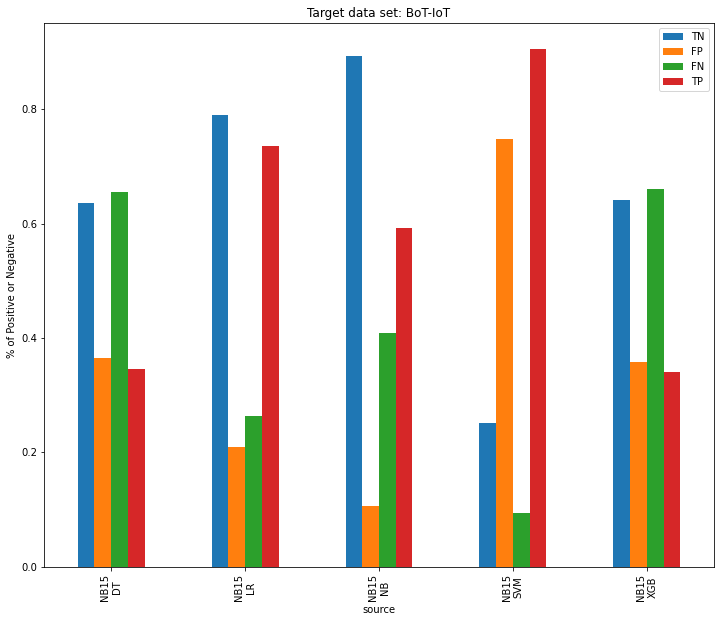

In [55]:
#graphs = {"AB-TRAP":["MLP", "SVM"], "internet":["SVM"], "ToN-IoT":["LR"]}#
graphs = {"NB15":["DT", "LR", "NB", "SVM", "XGB"]}
target= "BoT-IoT"
size = (12, 10)

g1 = data[data['target'].apply(lambda x: x.split("_")[1])==target].copy()    
g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/setInfo.loc[target][0])
g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/setInfo.loc[target][1])

g2 = []
for origin, models in graphs.items():
    for model in models:
        temp = g1[g1["origin"]==origin][[model+" TN", model+" FP", model+" FN", model+" TP"]].values[0]
        g2.append({"source":"{0}\n{1}".format(origin, model), "TN": temp[0], "FP": temp[1], "FN": temp[2], "TP": temp[3]})
        #print(["{0} {1}".format(origin, model)], temp )
g2 = pd.DataFrame(g2)


g2.plot(x="source", figsize=size, kind="bar", stacked=False, title="Target data set: {0}".format(target))
plt.ylabel('% of Positive or Negative')
plt.savefig("./dissertation/individuals/target_{0}_confusion_us_{1}.jpg".format(target, "nbOnes"), bbox_inches="tight") #"justOthers"

<ipython-input-8-ae9a53d9032c>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,10))


<Figure size 864x720 with 0 Axes>

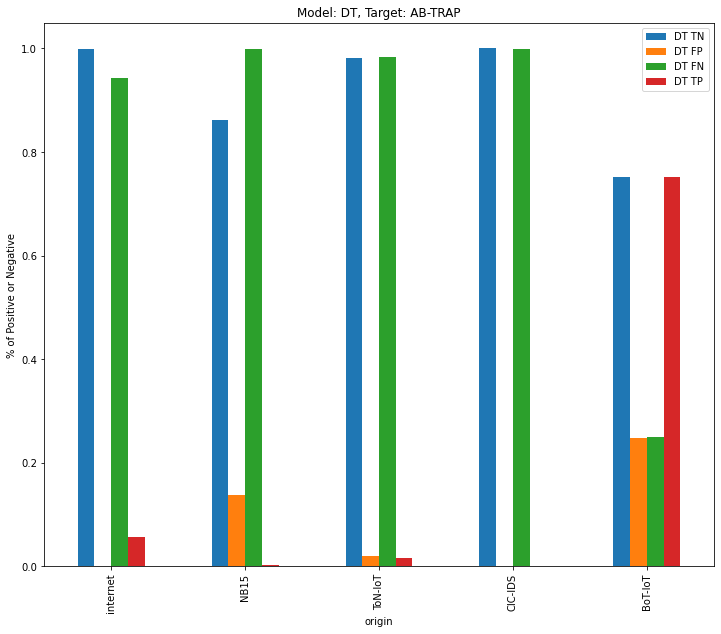

<Figure size 864x720 with 0 Axes>

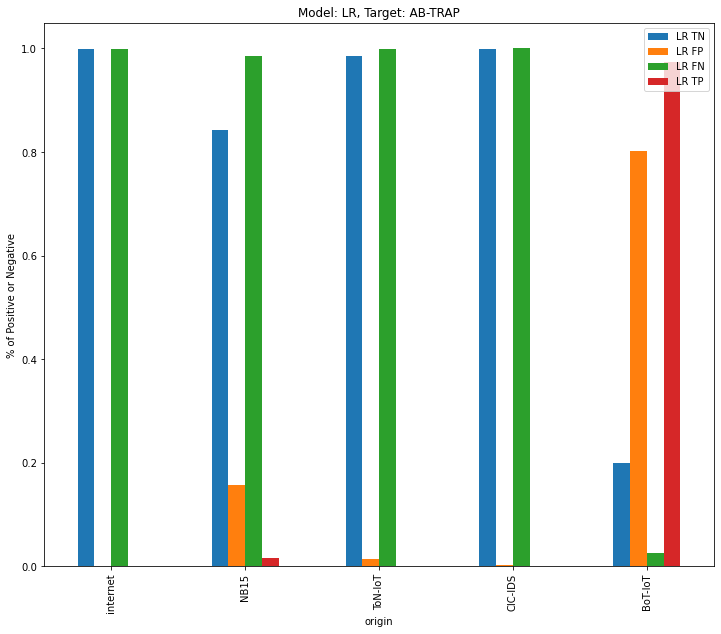

<Figure size 864x720 with 0 Axes>

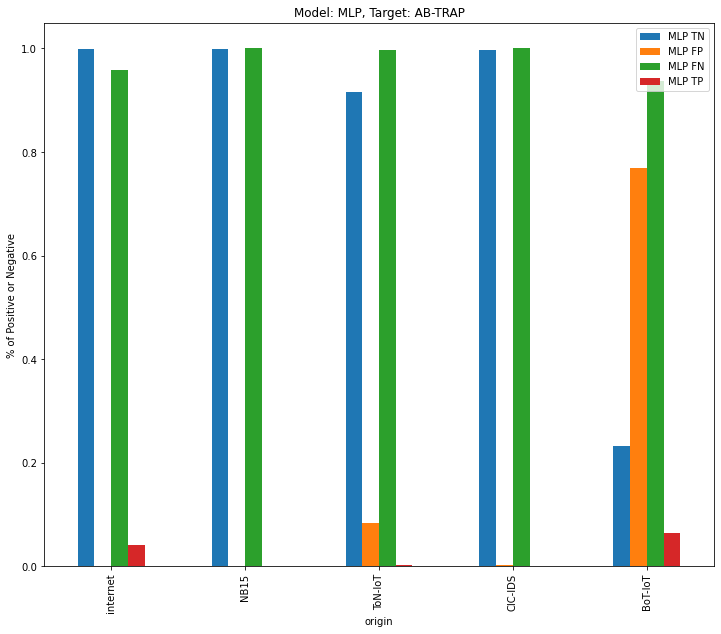

<Figure size 864x720 with 0 Axes>

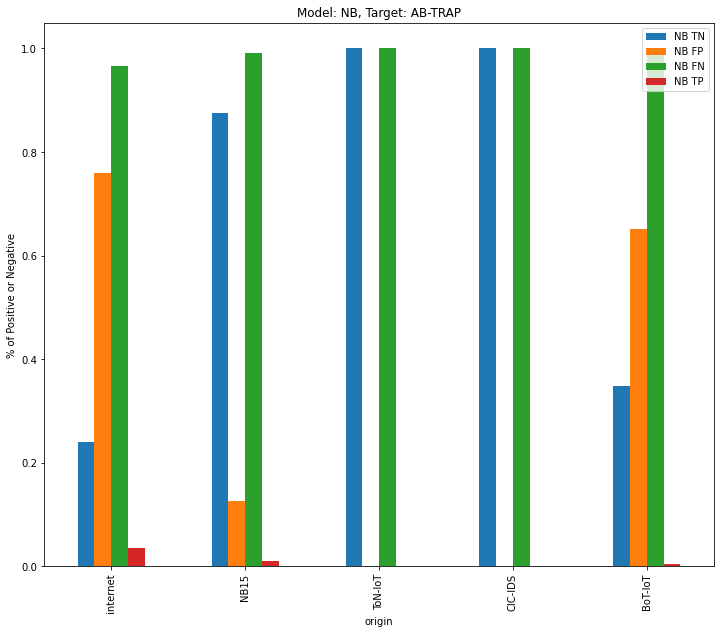

<Figure size 864x720 with 0 Axes>

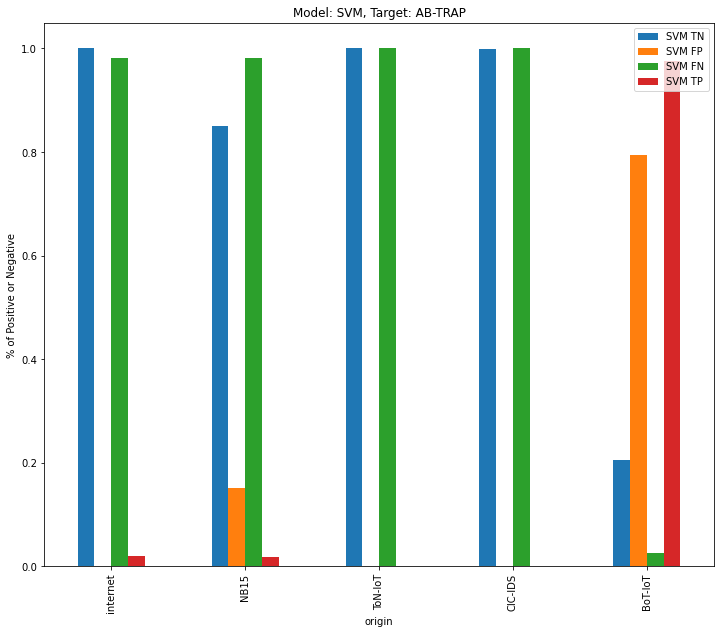

<Figure size 864x720 with 0 Axes>

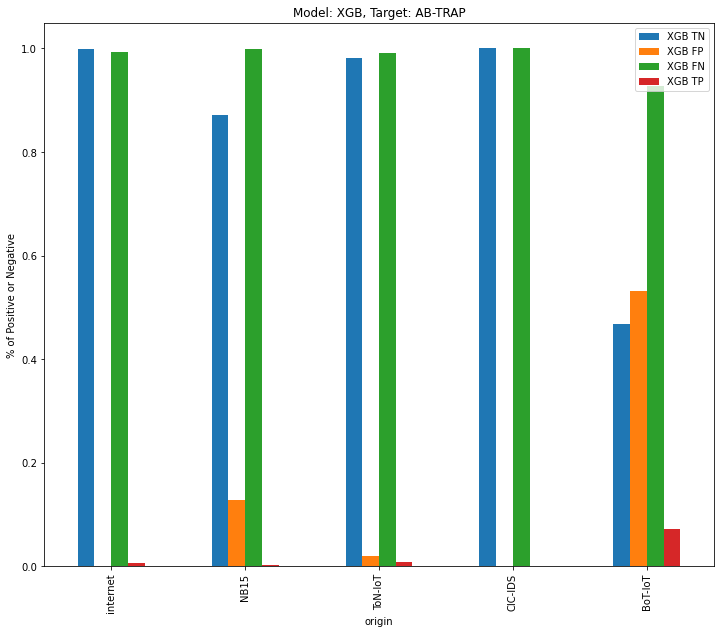

<Figure size 864x720 with 0 Axes>

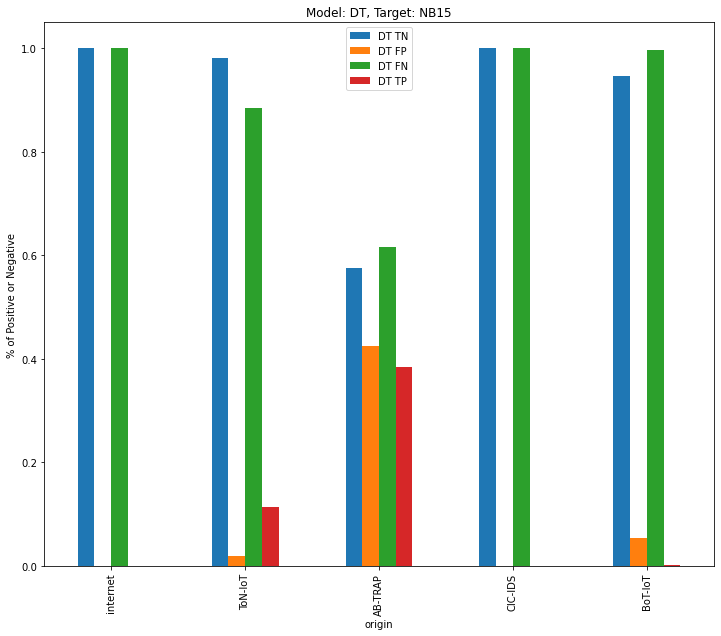

<Figure size 864x720 with 0 Axes>

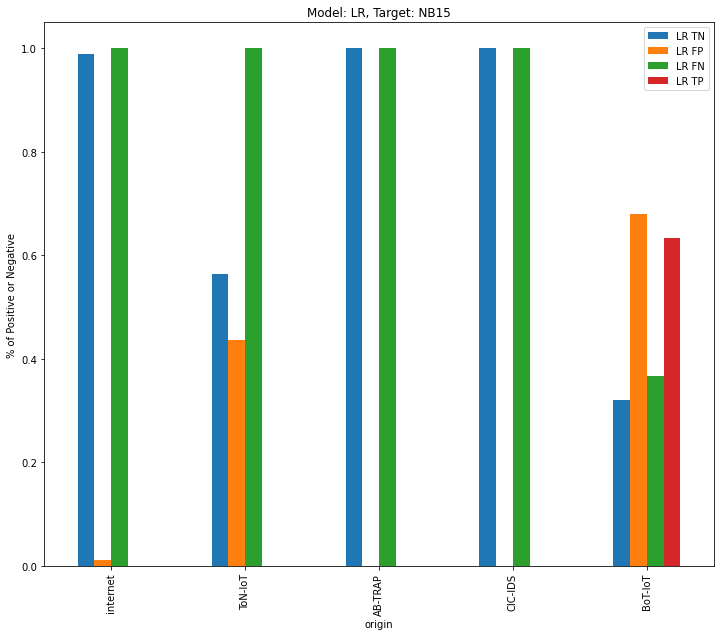

<Figure size 864x720 with 0 Axes>

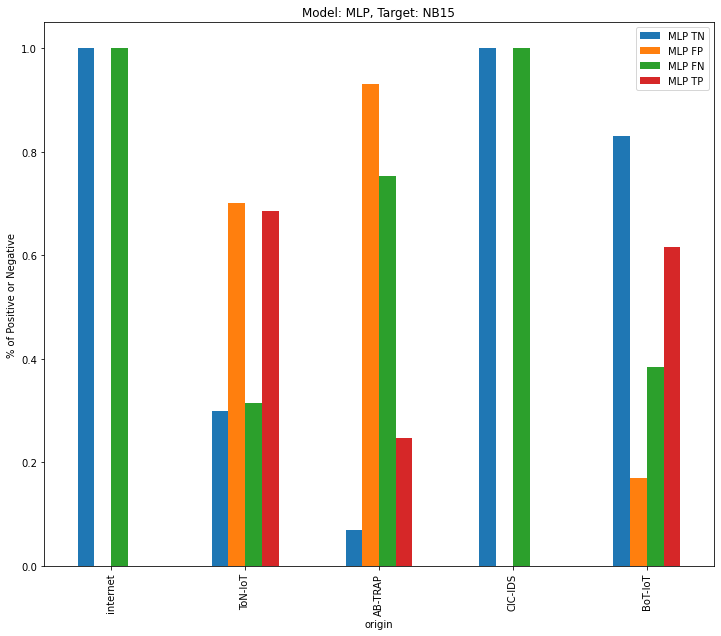

<Figure size 864x720 with 0 Axes>

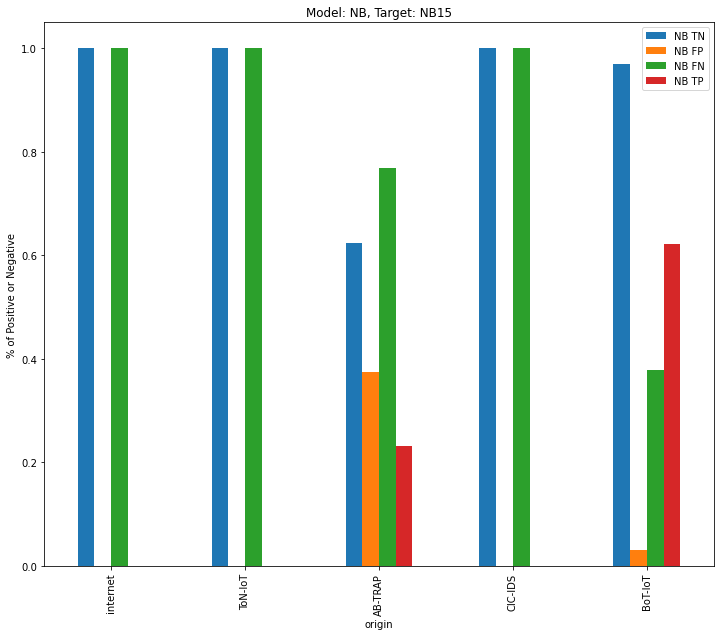

<Figure size 864x720 with 0 Axes>

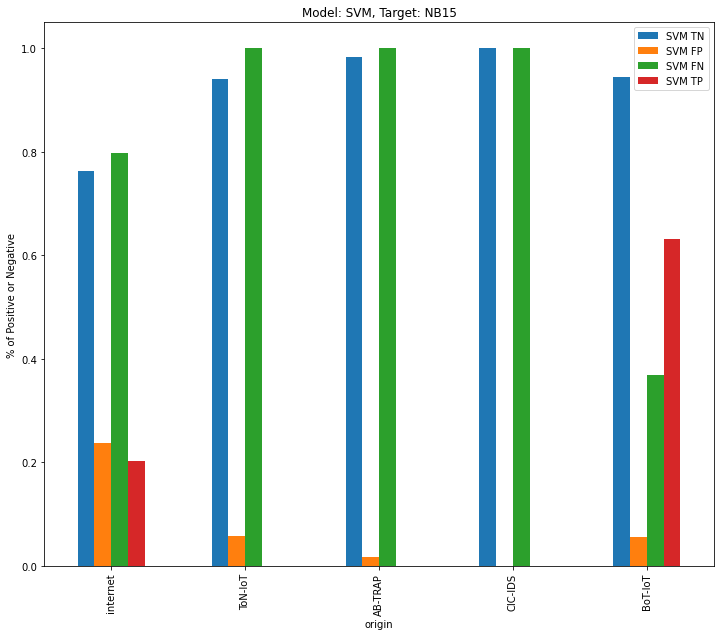

<Figure size 864x720 with 0 Axes>

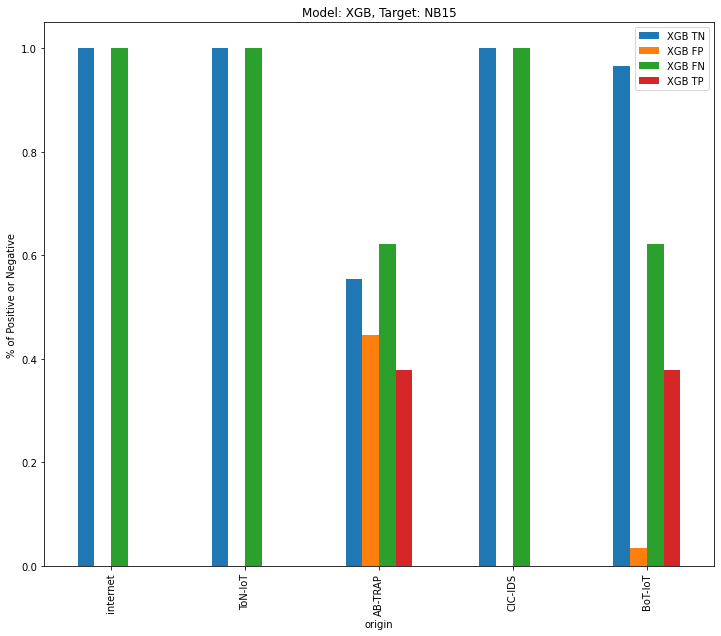

<Figure size 864x720 with 0 Axes>

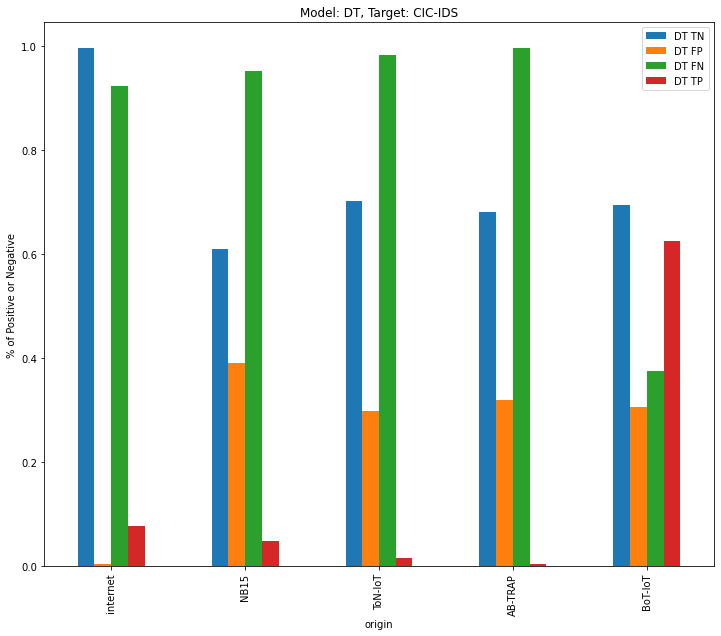

<Figure size 864x720 with 0 Axes>

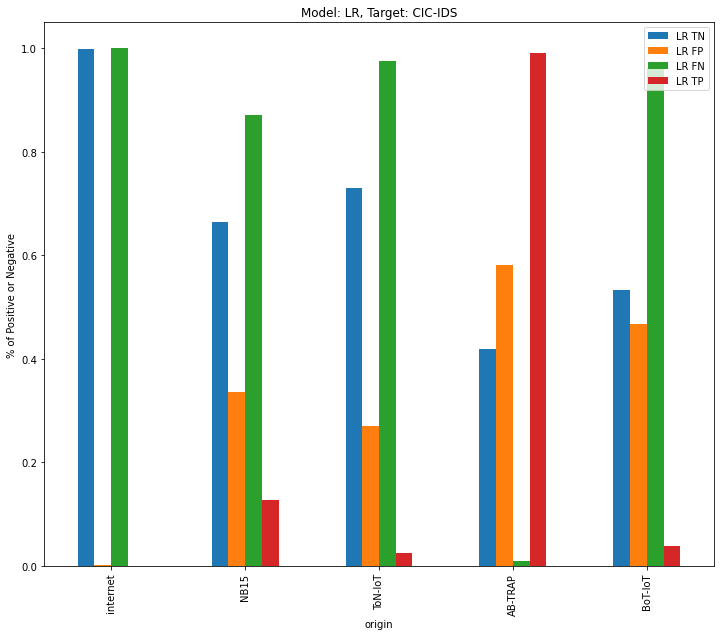

<Figure size 864x720 with 0 Axes>

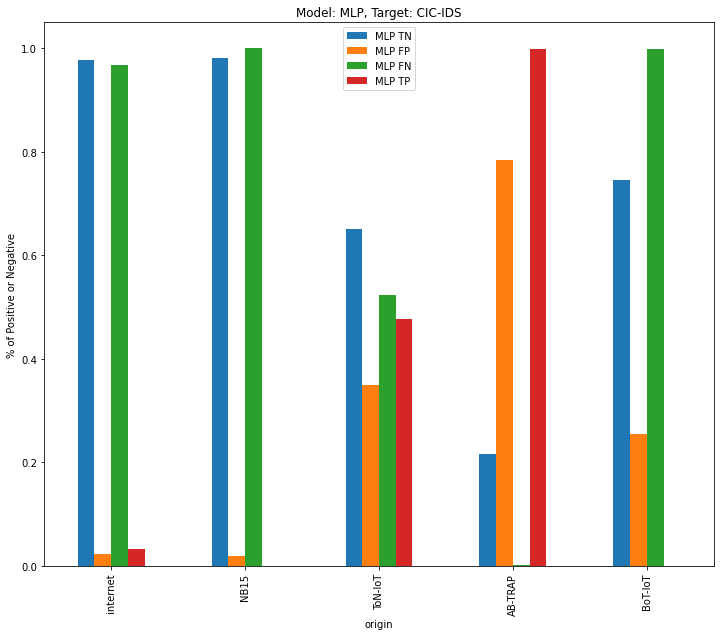

<Figure size 864x720 with 0 Axes>

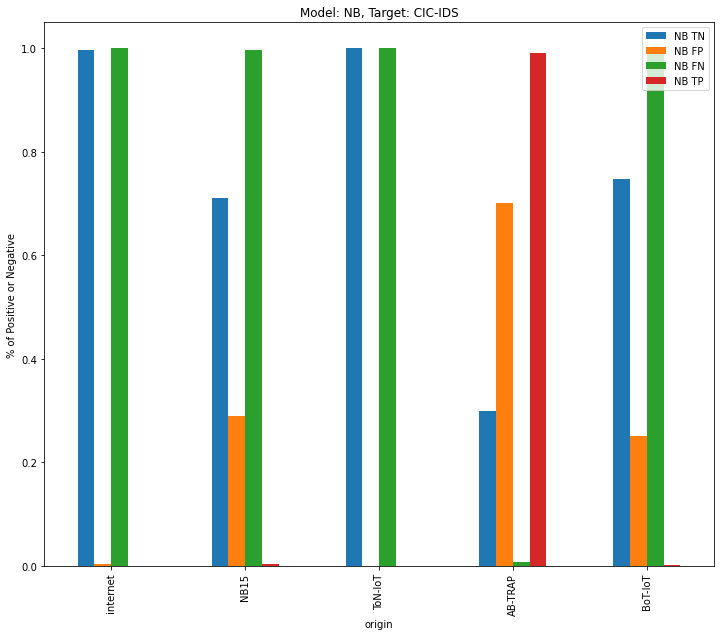

<Figure size 864x720 with 0 Axes>

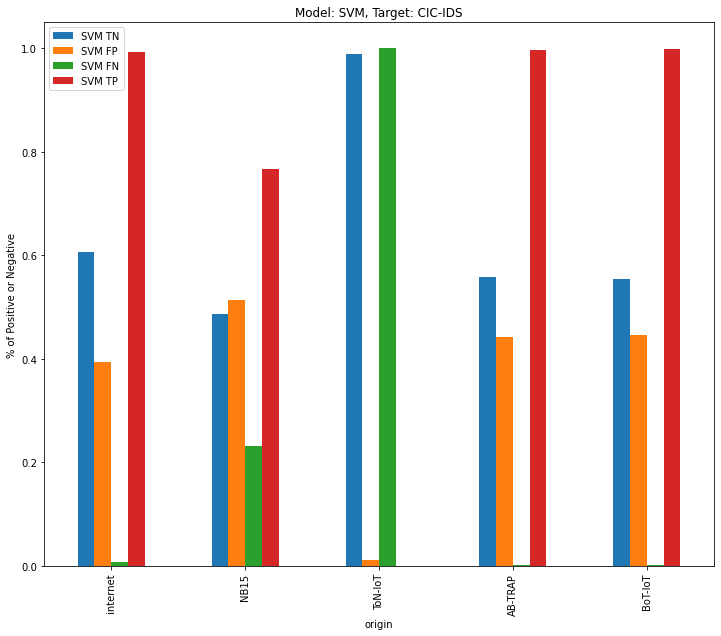

<Figure size 864x720 with 0 Axes>

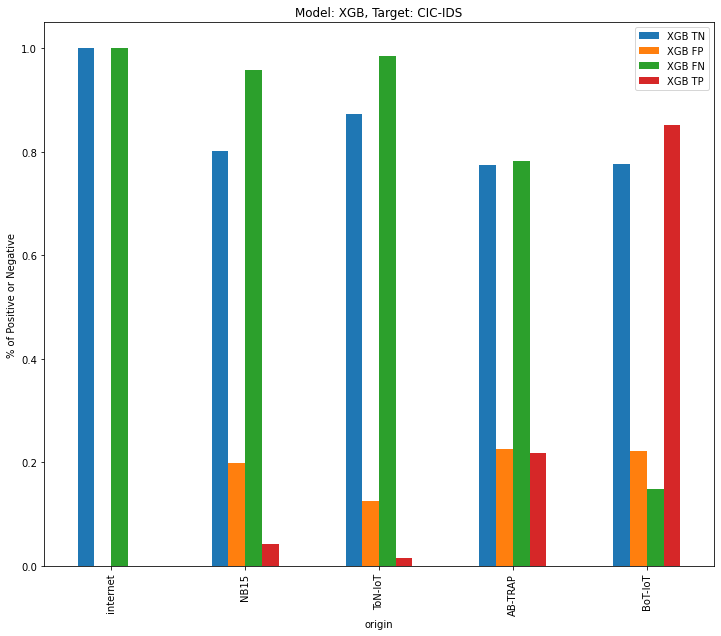

<Figure size 864x720 with 0 Axes>

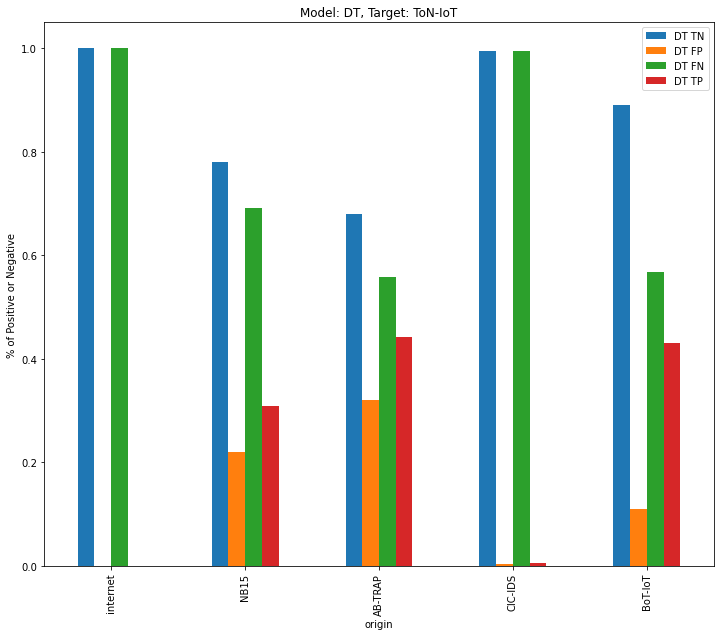

<Figure size 864x720 with 0 Axes>

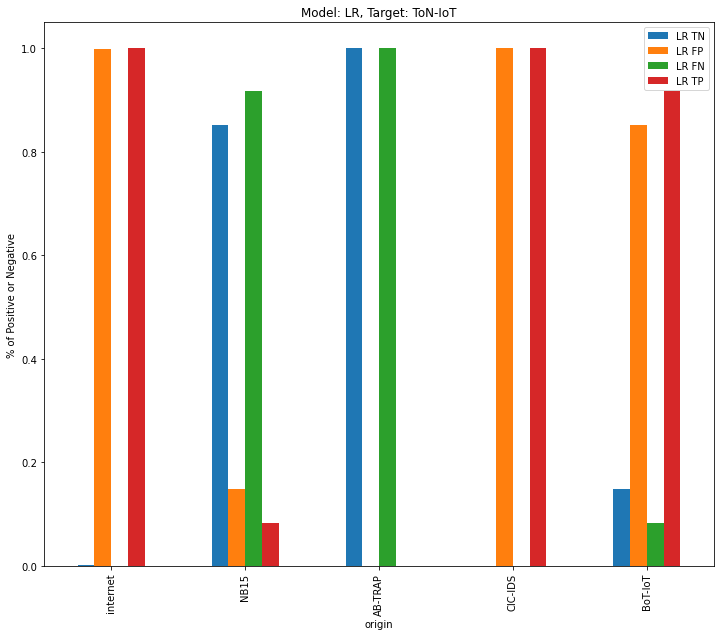

<Figure size 864x720 with 0 Axes>

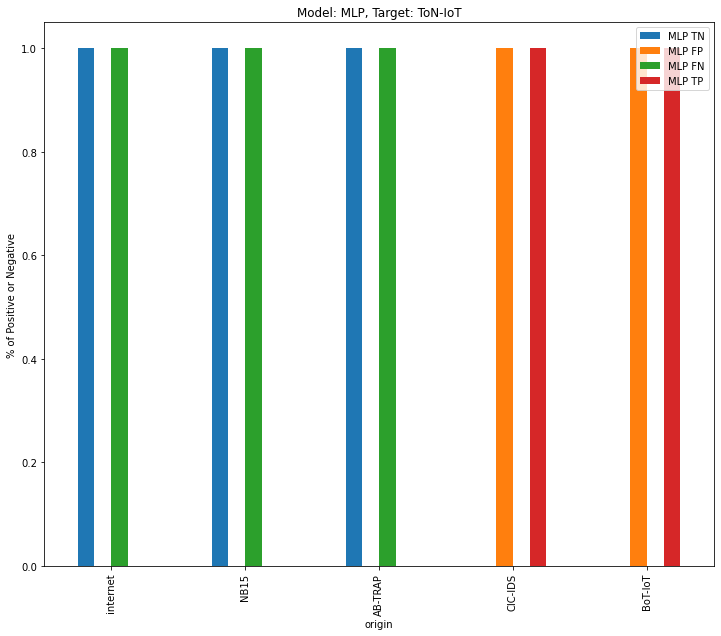

<Figure size 864x720 with 0 Axes>

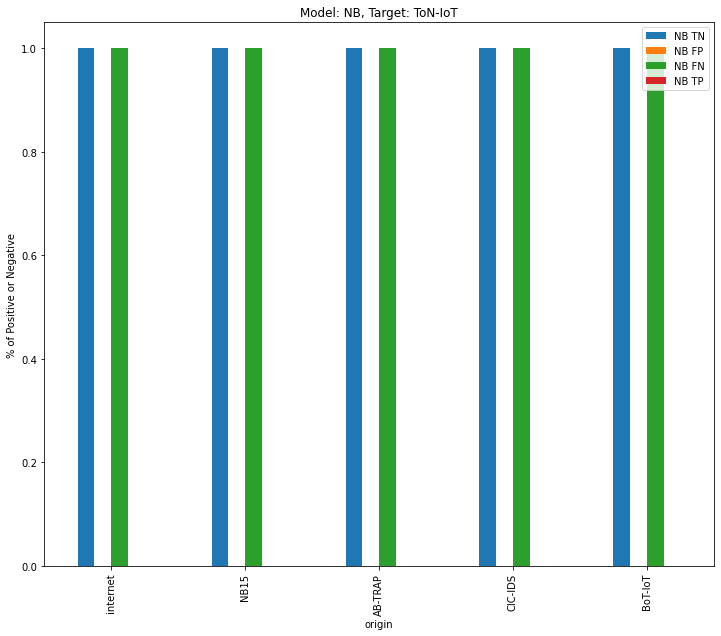

<Figure size 864x720 with 0 Axes>

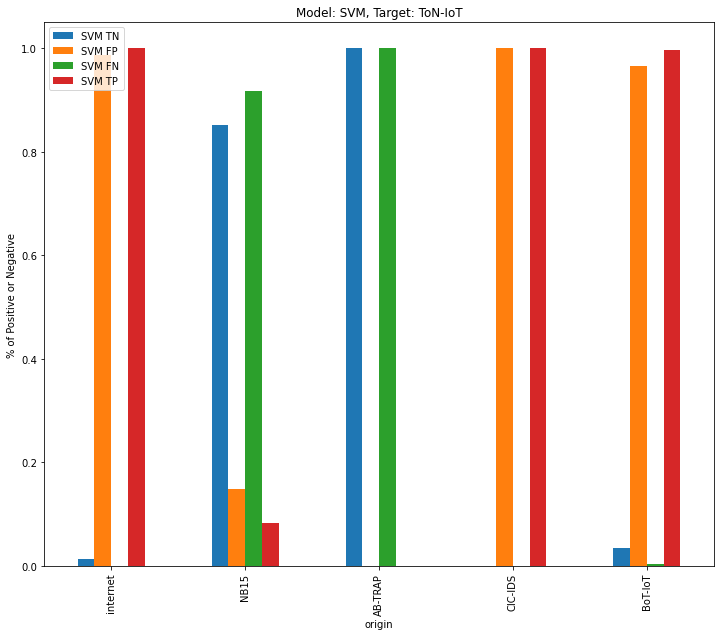

<Figure size 864x720 with 0 Axes>

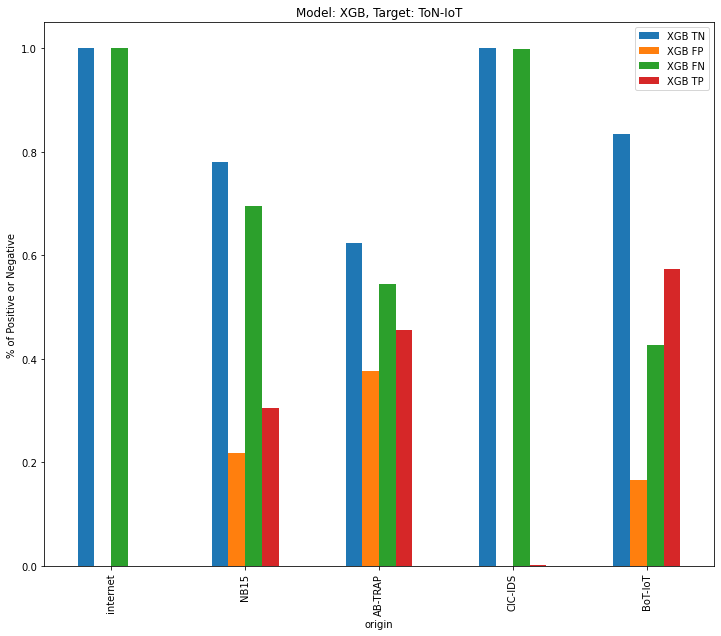

<Figure size 864x720 with 0 Axes>

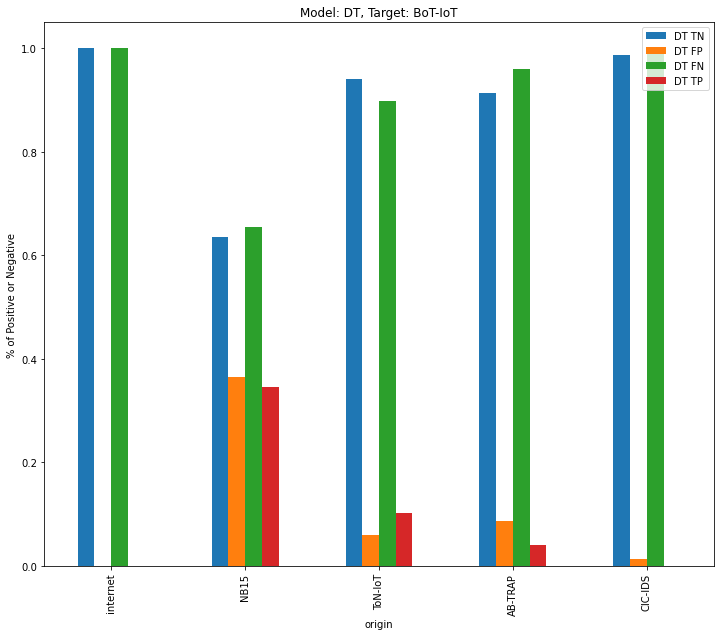

<Figure size 864x720 with 0 Axes>

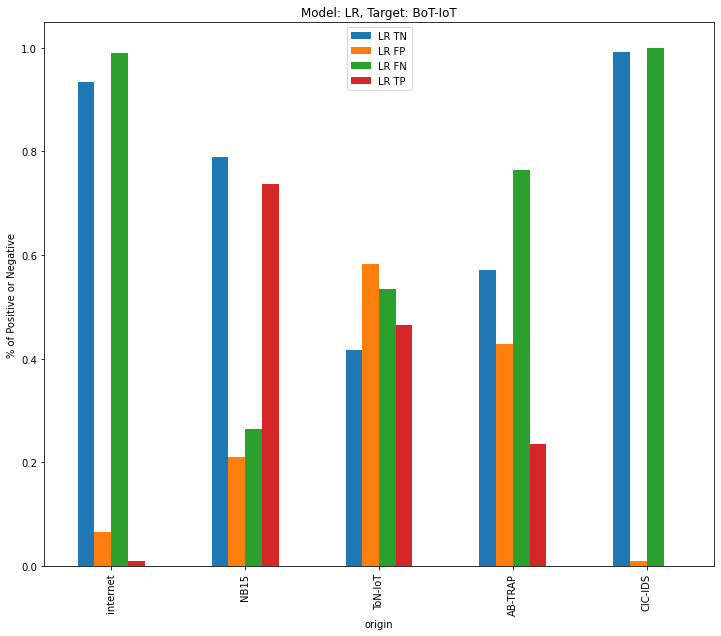

<Figure size 864x720 with 0 Axes>

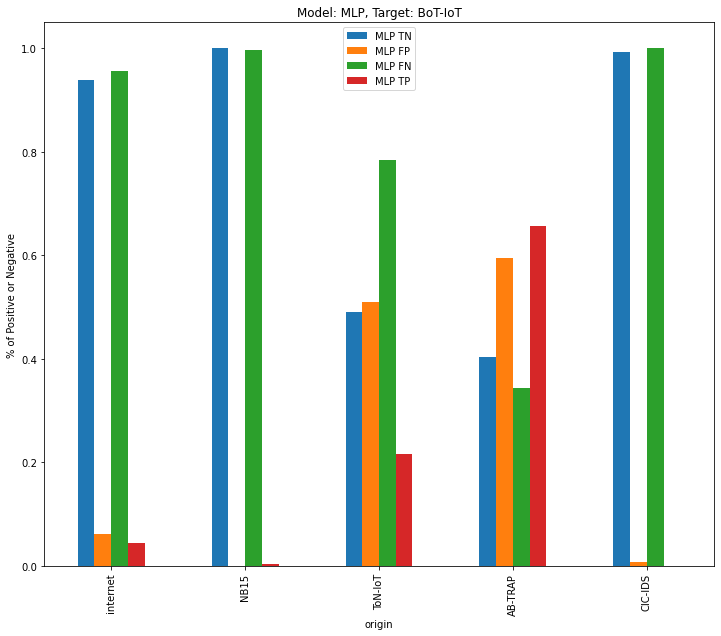

<Figure size 864x720 with 0 Axes>

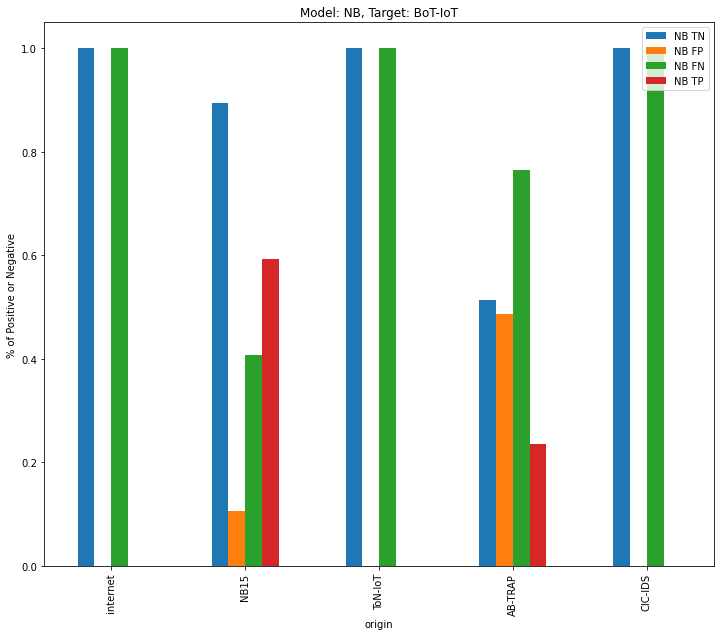

<Figure size 864x720 with 0 Axes>

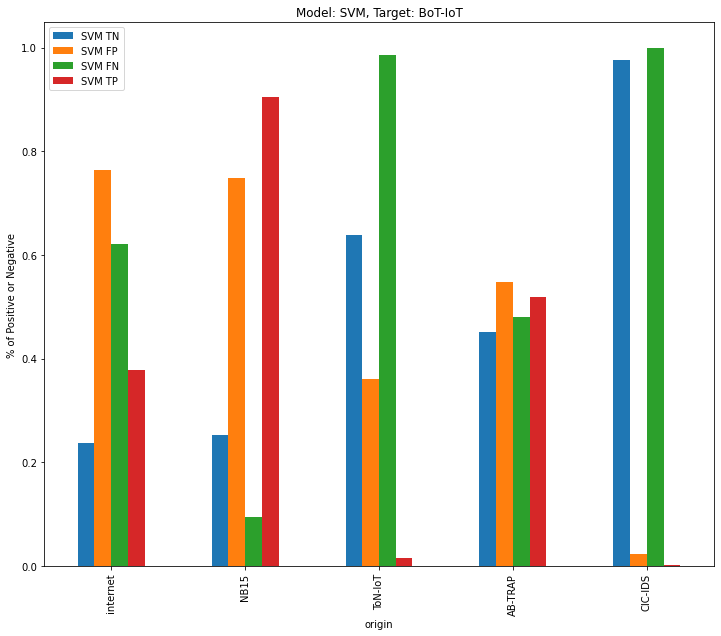

<Figure size 864x720 with 0 Axes>

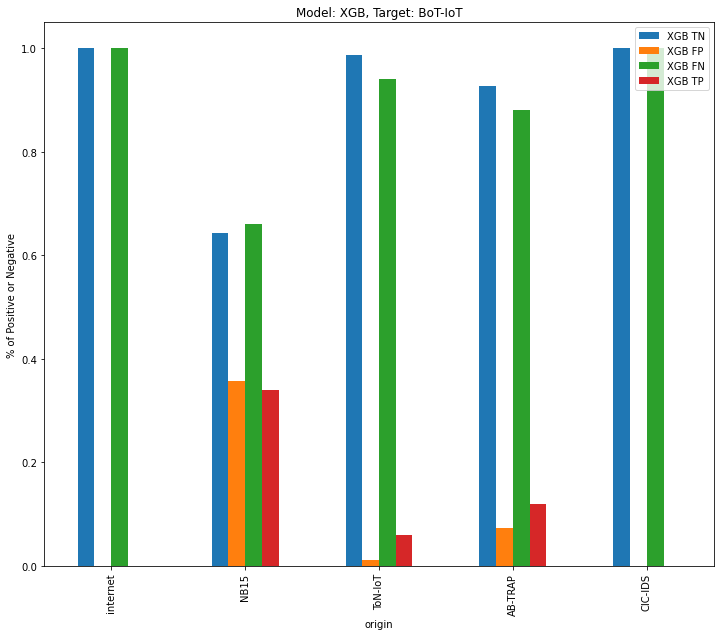

<Figure size 864x720 with 0 Axes>

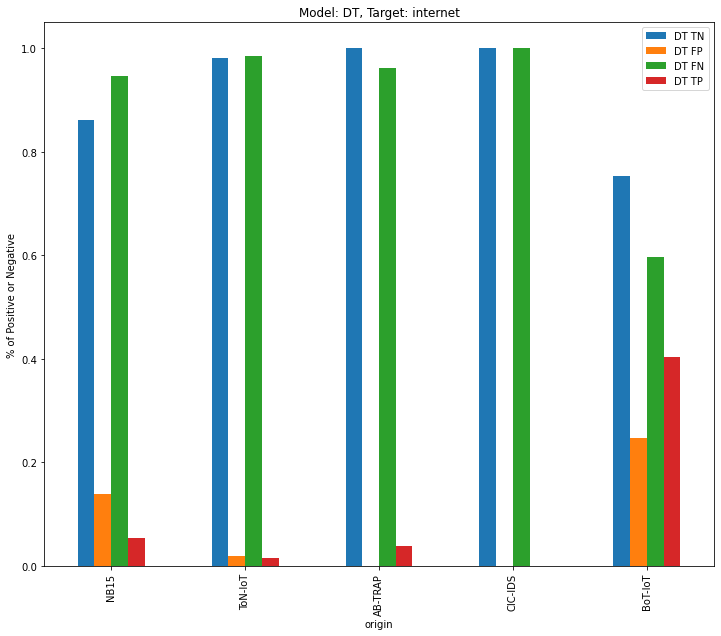

<Figure size 864x720 with 0 Axes>

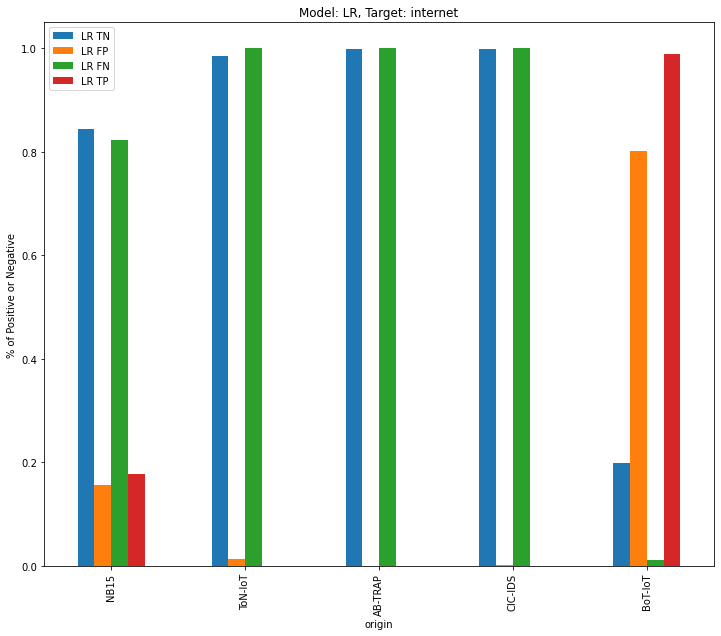

<Figure size 864x720 with 0 Axes>

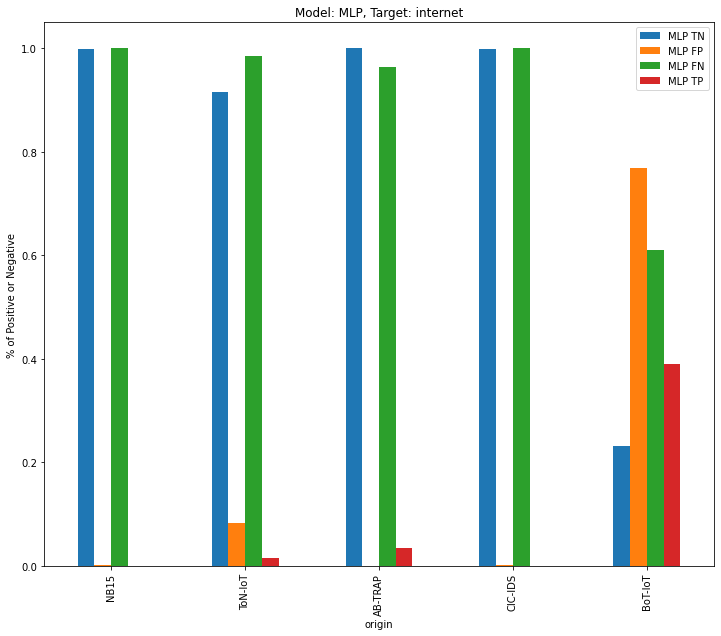

<Figure size 864x720 with 0 Axes>

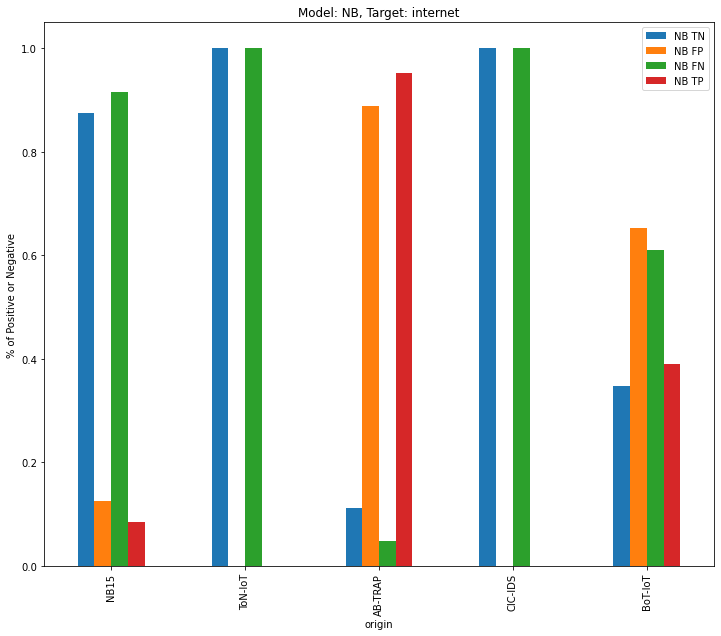

<Figure size 864x720 with 0 Axes>

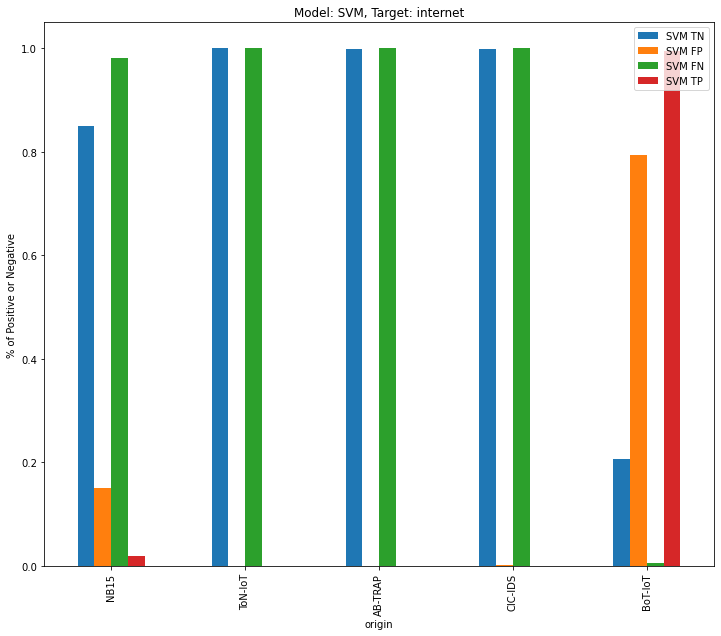

<Figure size 864x720 with 0 Axes>

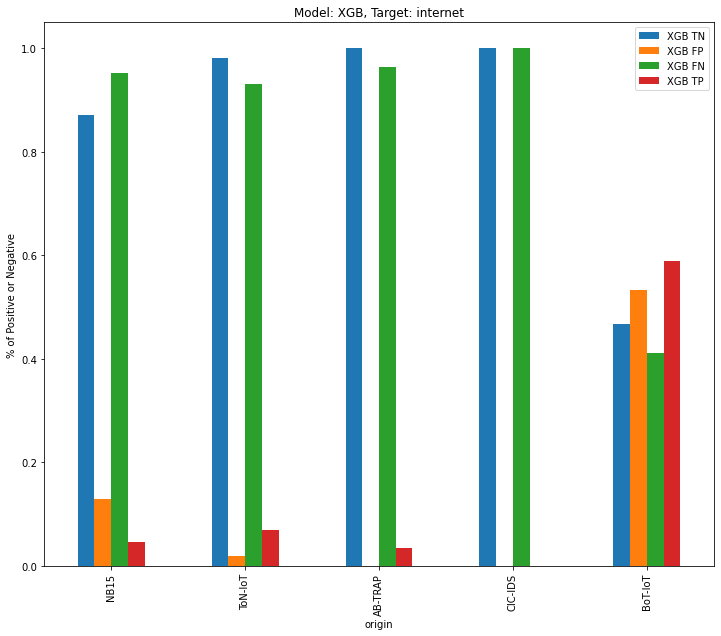

In [8]:
# Target: BoT-IoT
# Origin    models
#-------    ----------------
# AB-TRAP   MLP SVM
# internet  SVM
# ton-iot   LR
# NB15      DT LR NB SVM XGB

graphs = {"AB-TRAP":["MLP", "SVM"], "internet":["SVM"], "ToN-IoT":["LR"]}#, "NB15":["DT", "LR", "NB", "SVM", "XGB"]}
target= "BoT-IoT"
size = (12, 10)

g1 = data[data['target'].apply(lambda x: x.split("_")[1])==target].copy()    
g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/setInfo.loc[target][0])
g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/setInfo.loc[target][1])

for target, models in graphs.items():
    for model in models:
        print (target, model)

    for x in range(0,g1.shape[1]-5,4):
        fig = plt.figure(figsize=(12,10))
        MLname = g1.columns[1+x].split(" ")[0]
        cols = list(range(1+x,5+x))
        cols.extend([g1.shape[1]-1,0])
        g2 = g1.iloc[:,cols]
        g2.plot(x="origin", figsize=size, kind="bar", stacked=False, title="Model: {0}, Target: {1}".format(MLname,line[0])) # Machine {1} tested on {0}".format(line[0],MLname)
        plt.ylabel('% of Positive or Negative')
        #fig.suptitle("Target: {0}".format(line[0]), fontsize=32)
        #fig.tight_layout()
        plt.savefig("./dissertation/individuals/target_{0}_confusion_{1}.jpg".format(line[0], MLname), bbox_inches="tight")
        plt.close()
    #fig.subplots_adjust(top=0.9)
    

### Conf Matrix individuals

<ipython-input-8-ae9a53d9032c>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,10))


<Figure size 864x720 with 0 Axes>

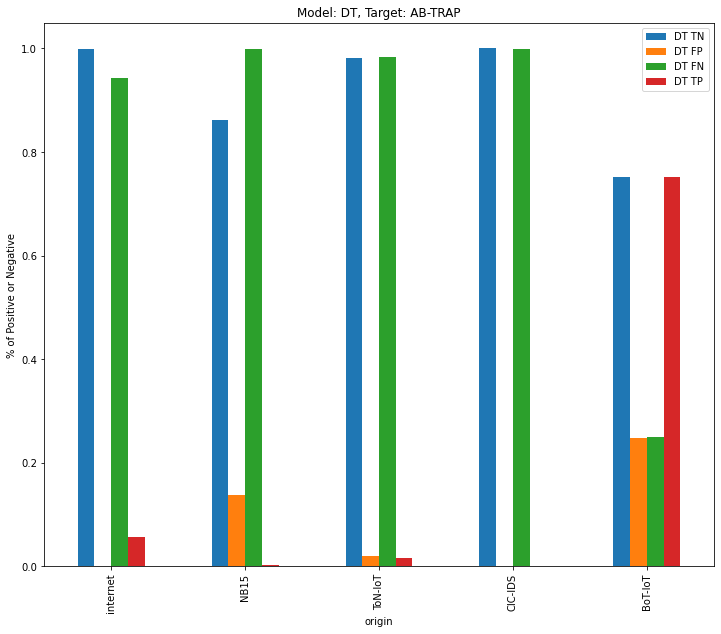

<Figure size 864x720 with 0 Axes>

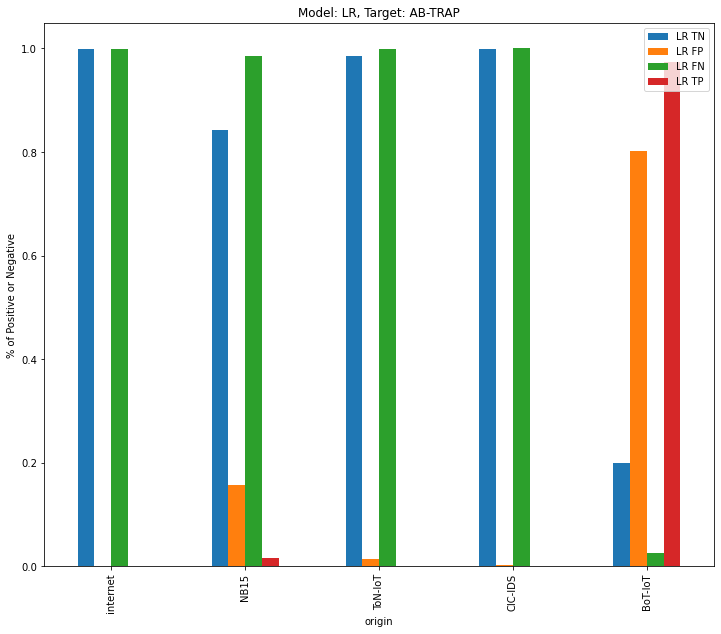

<Figure size 864x720 with 0 Axes>

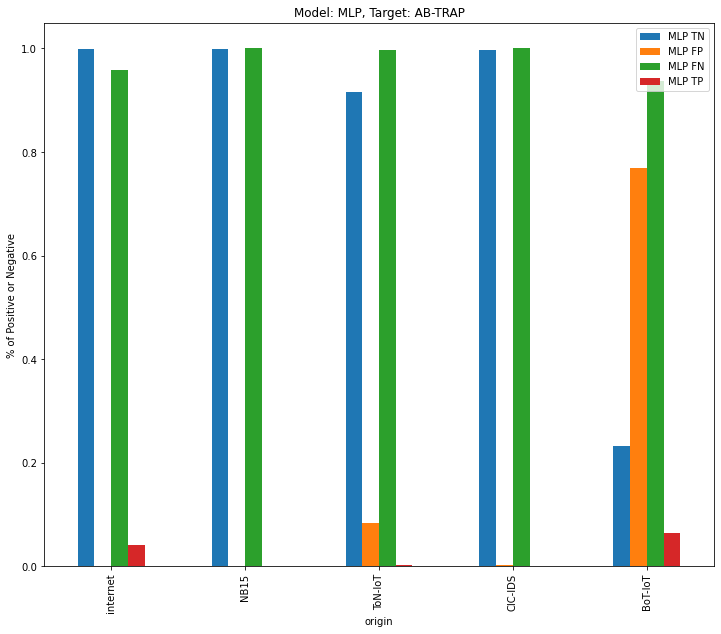

<Figure size 864x720 with 0 Axes>

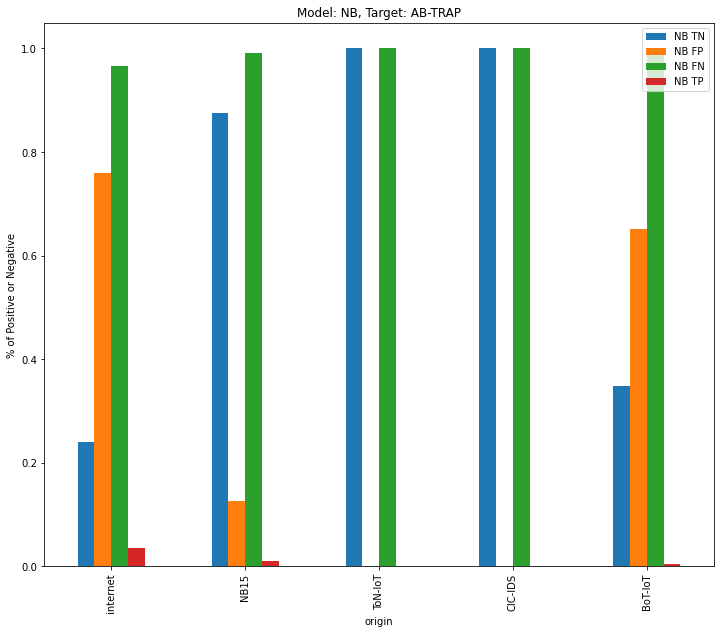

<Figure size 864x720 with 0 Axes>

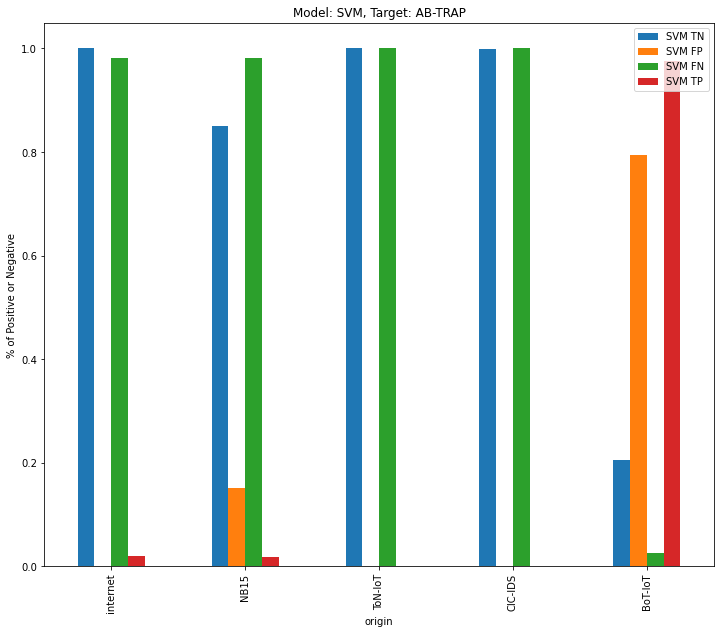

<Figure size 864x720 with 0 Axes>

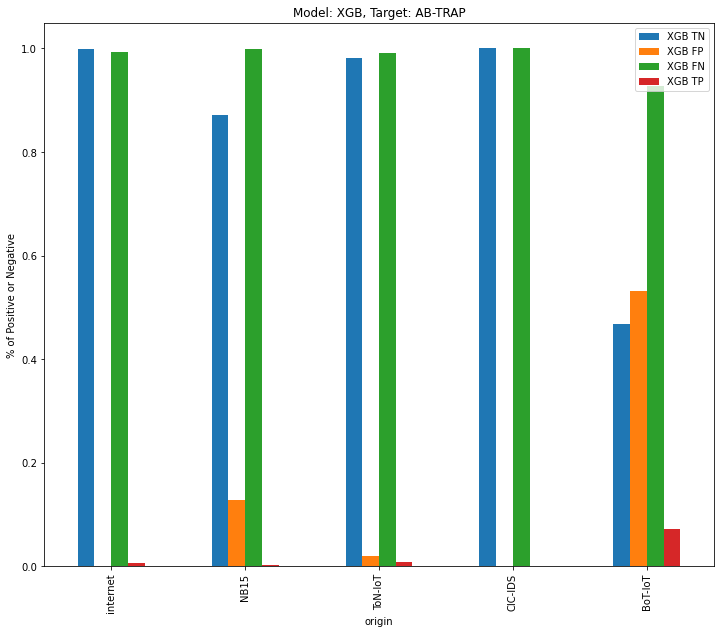

<Figure size 864x720 with 0 Axes>

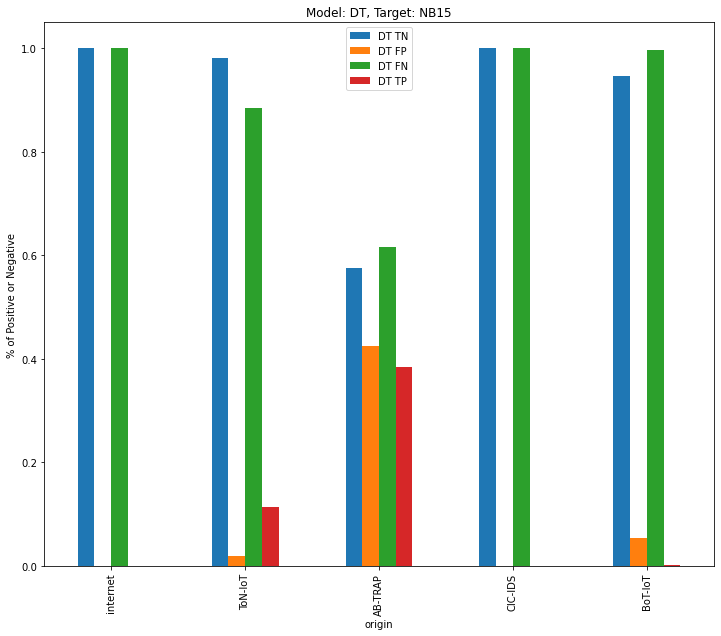

<Figure size 864x720 with 0 Axes>

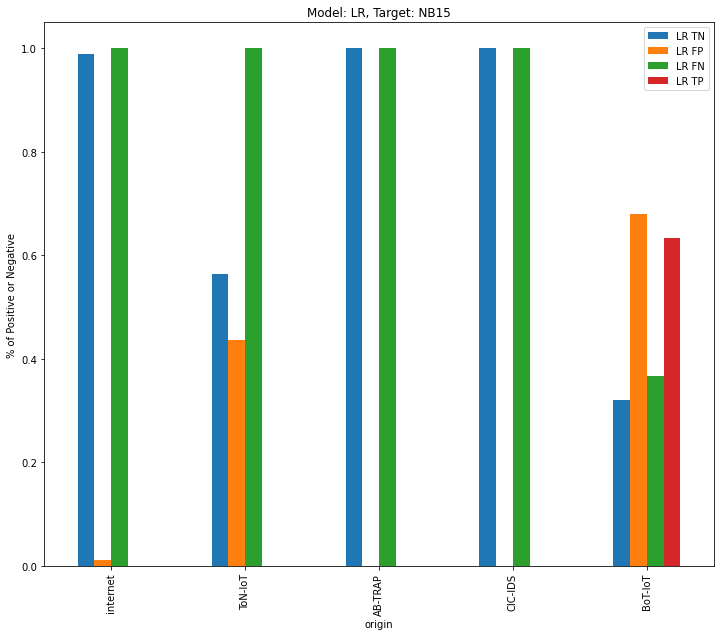

<Figure size 864x720 with 0 Axes>

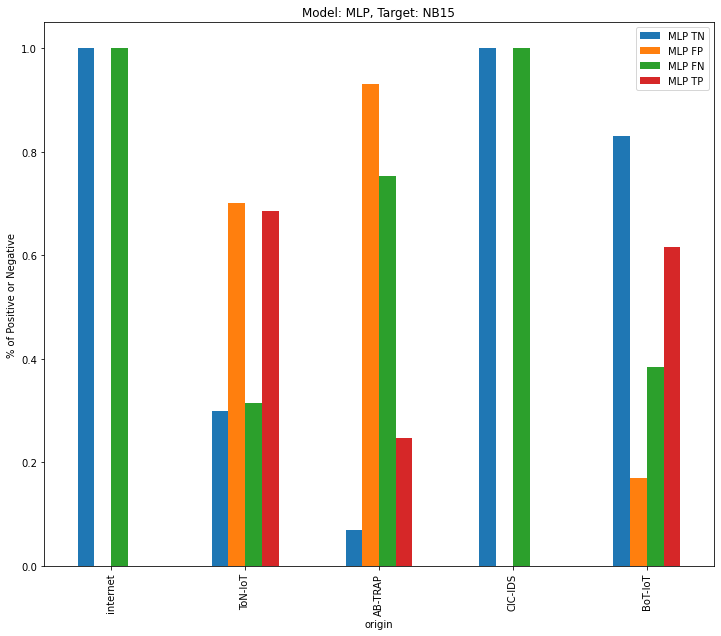

<Figure size 864x720 with 0 Axes>

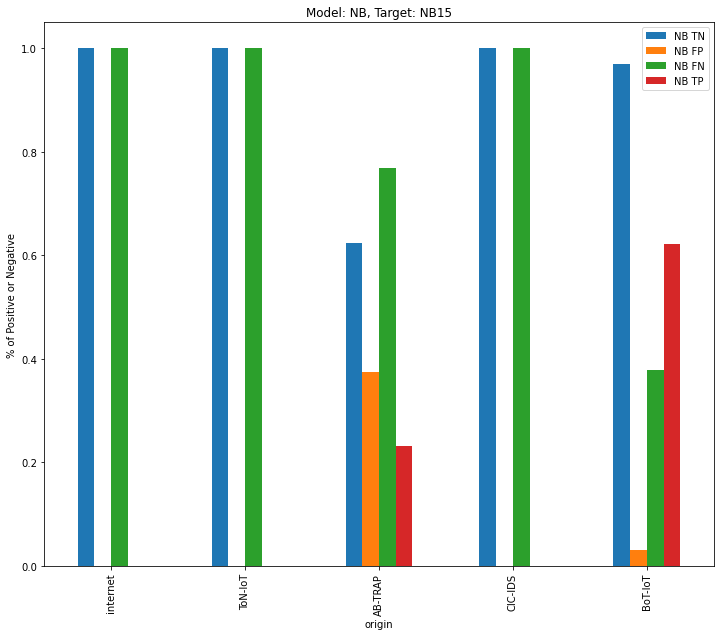

<Figure size 864x720 with 0 Axes>

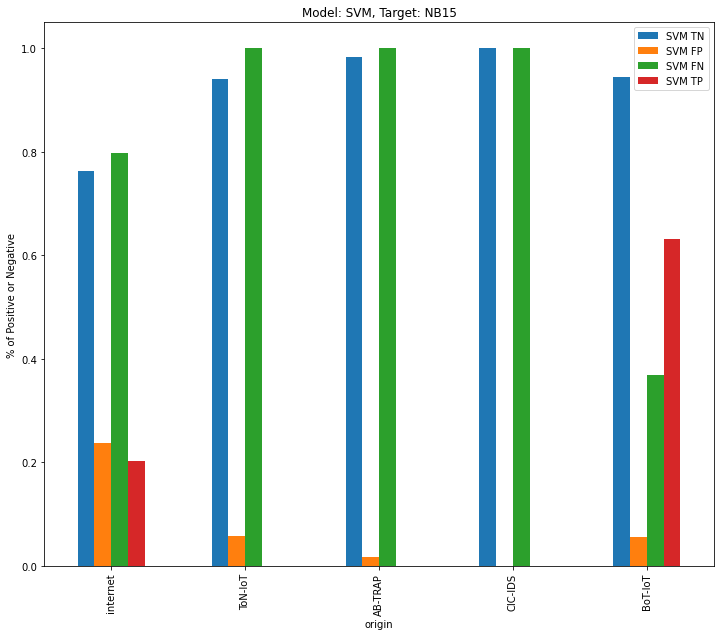

<Figure size 864x720 with 0 Axes>

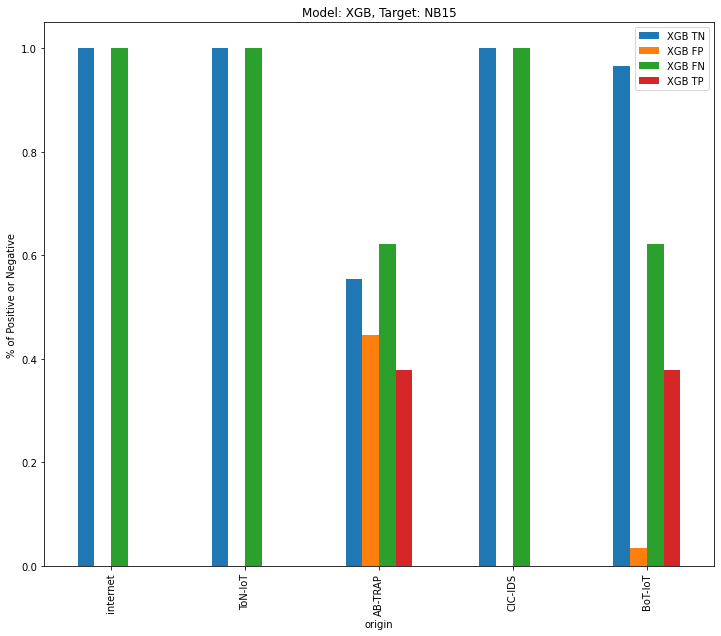

<Figure size 864x720 with 0 Axes>

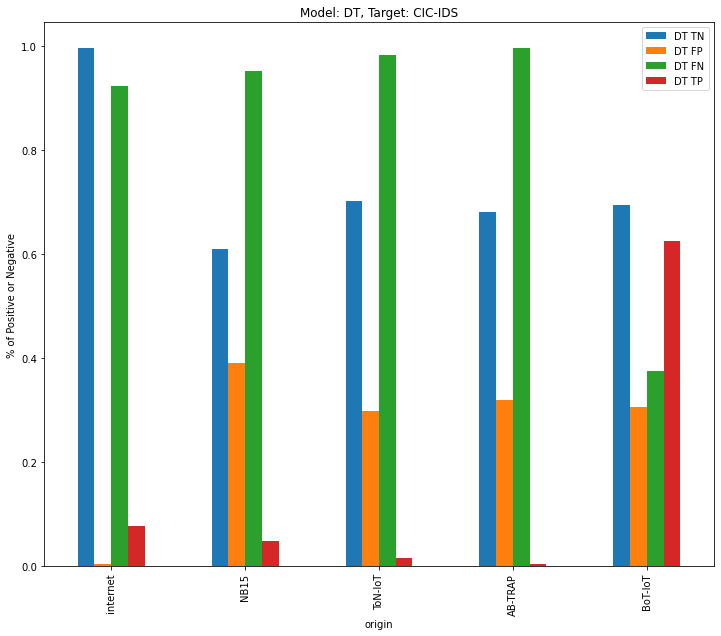

<Figure size 864x720 with 0 Axes>

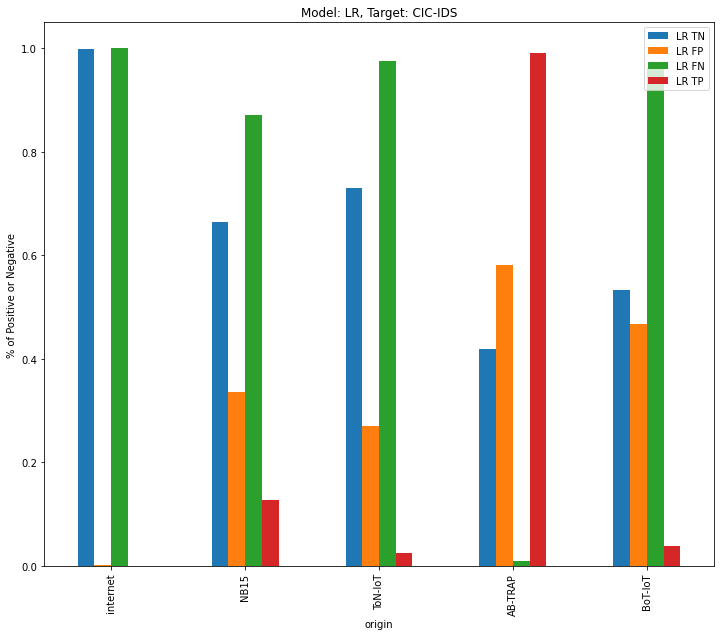

<Figure size 864x720 with 0 Axes>

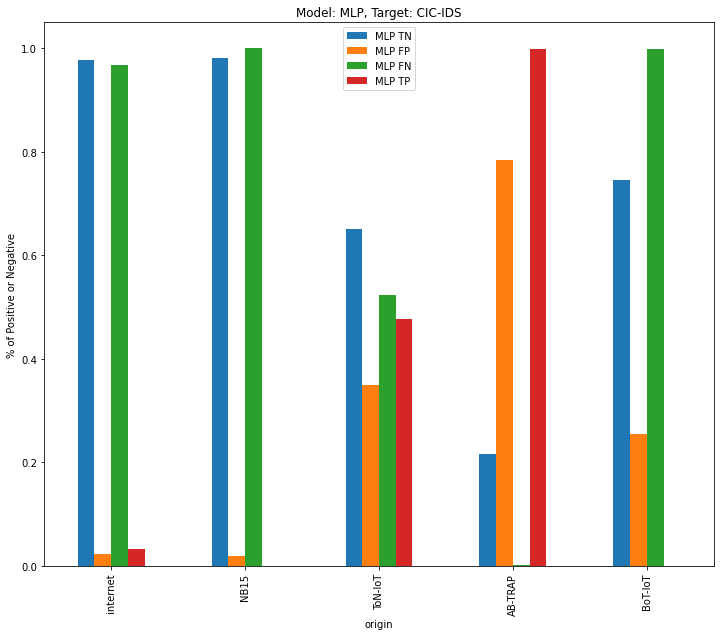

<Figure size 864x720 with 0 Axes>

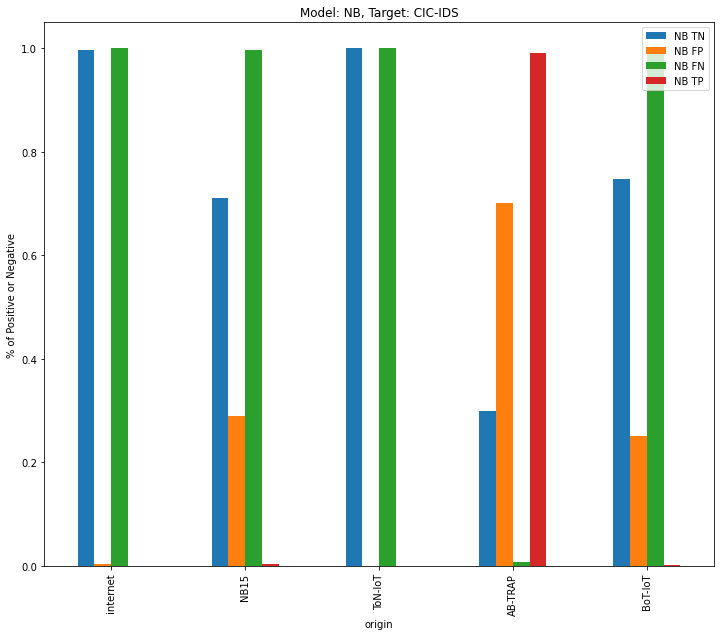

<Figure size 864x720 with 0 Axes>

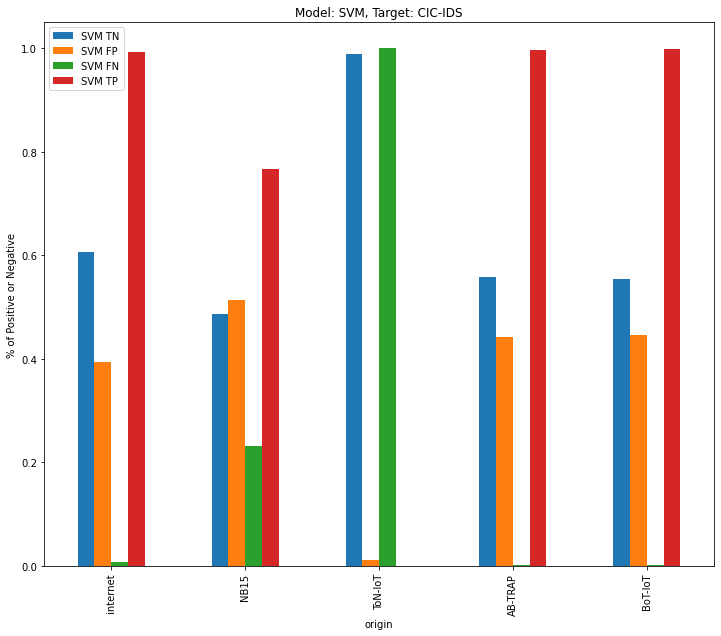

<Figure size 864x720 with 0 Axes>

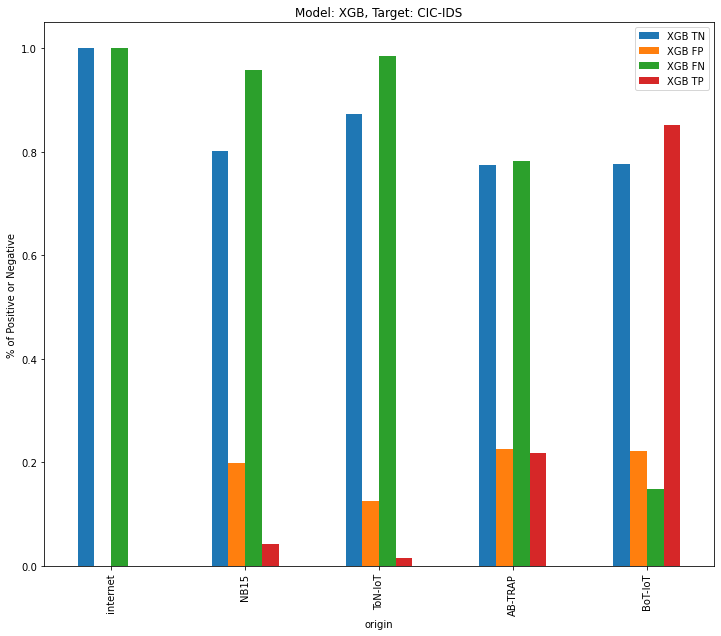

<Figure size 864x720 with 0 Axes>

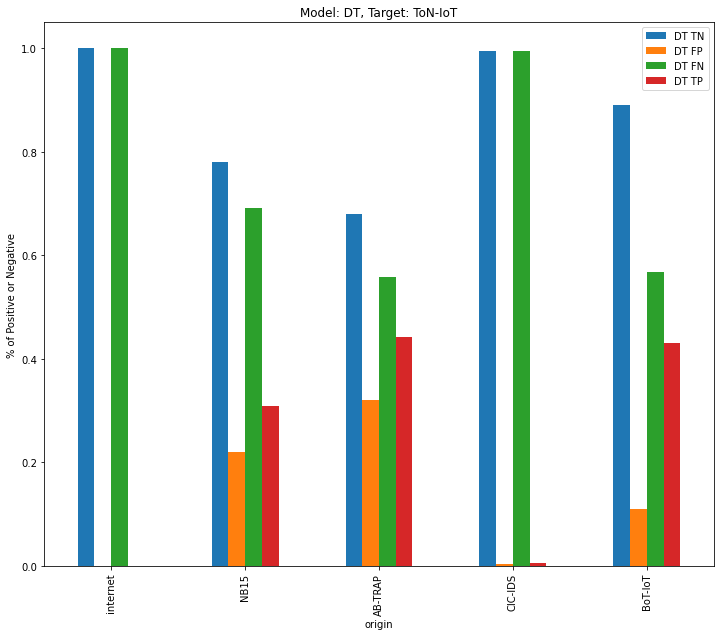

<Figure size 864x720 with 0 Axes>

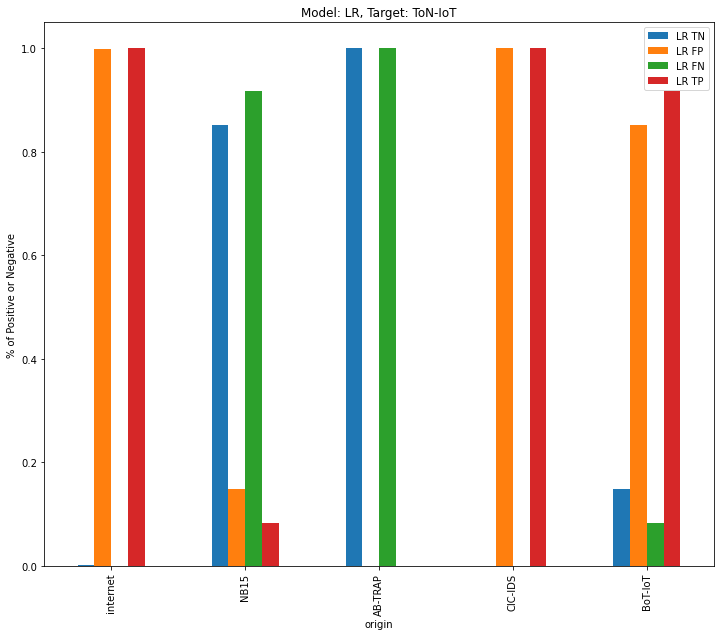

<Figure size 864x720 with 0 Axes>

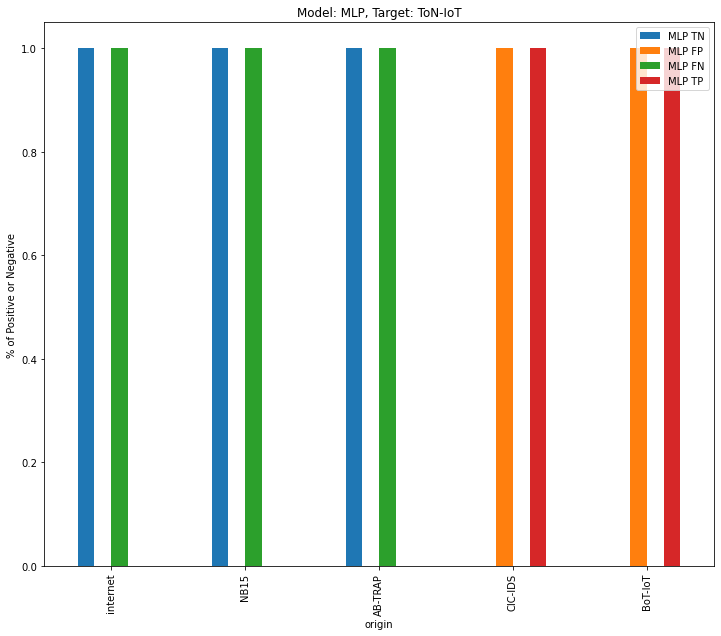

<Figure size 864x720 with 0 Axes>

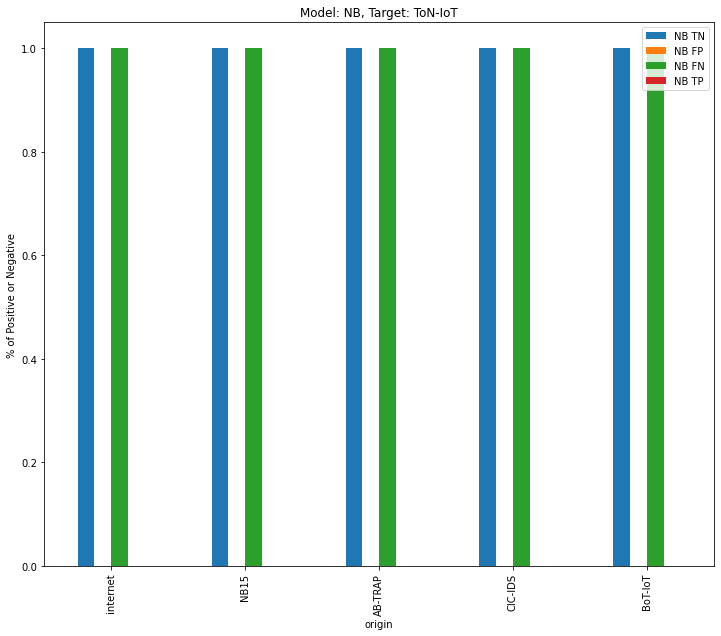

<Figure size 864x720 with 0 Axes>

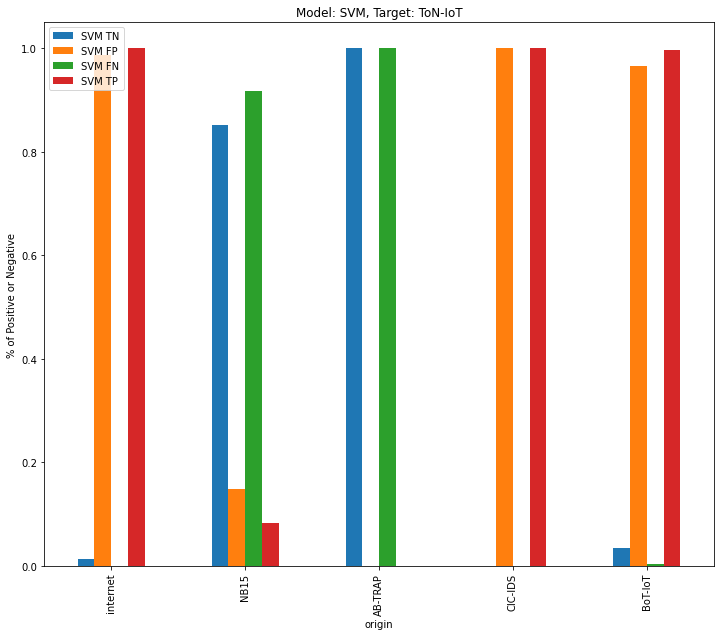

<Figure size 864x720 with 0 Axes>

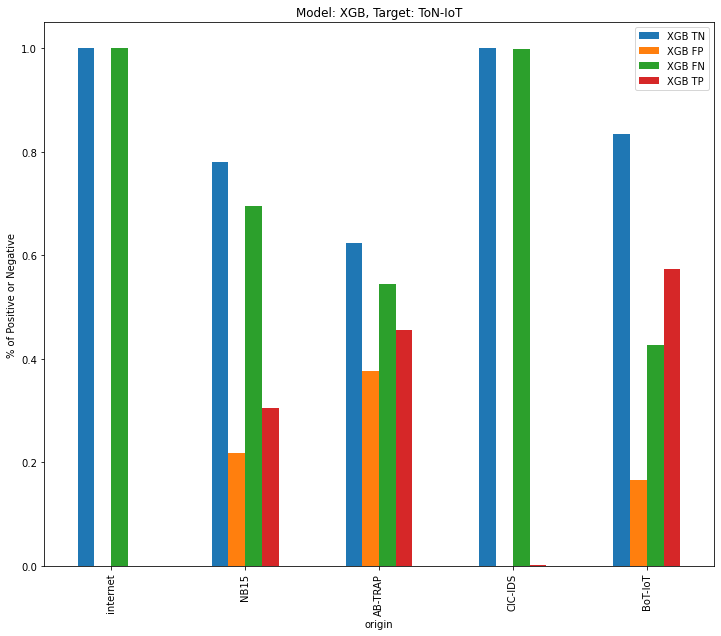

<Figure size 864x720 with 0 Axes>

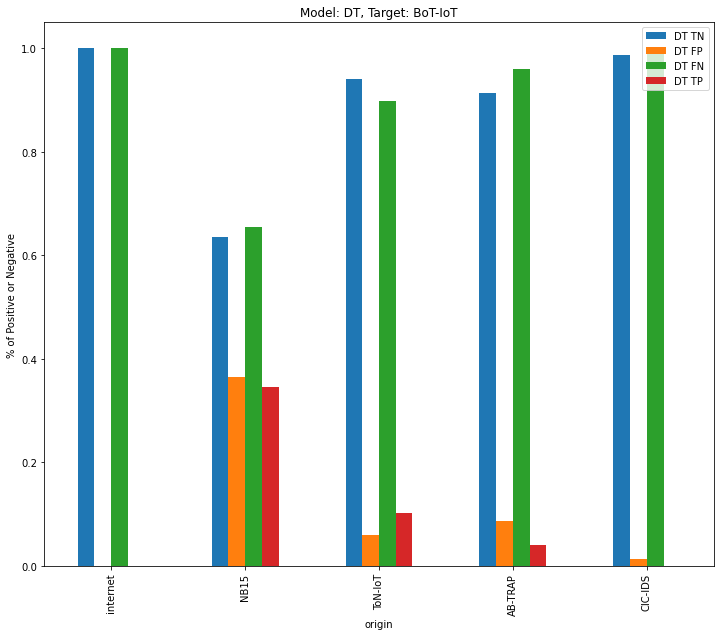

<Figure size 864x720 with 0 Axes>

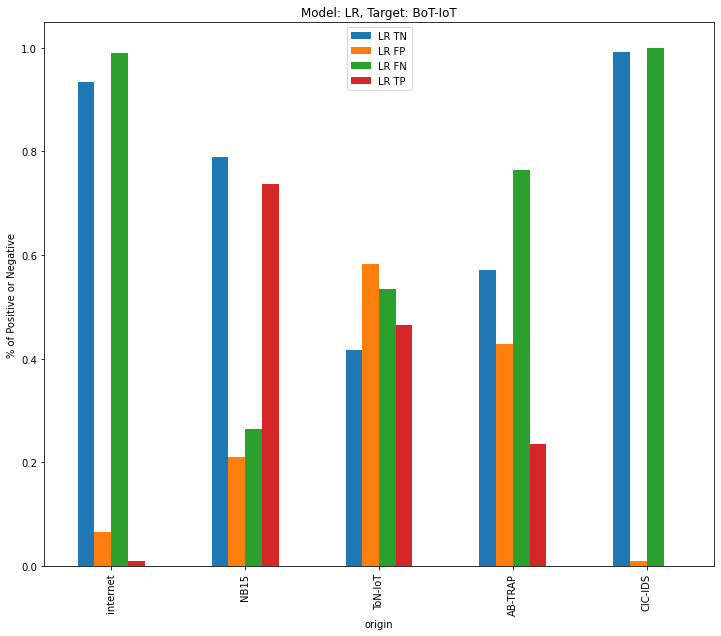

<Figure size 864x720 with 0 Axes>

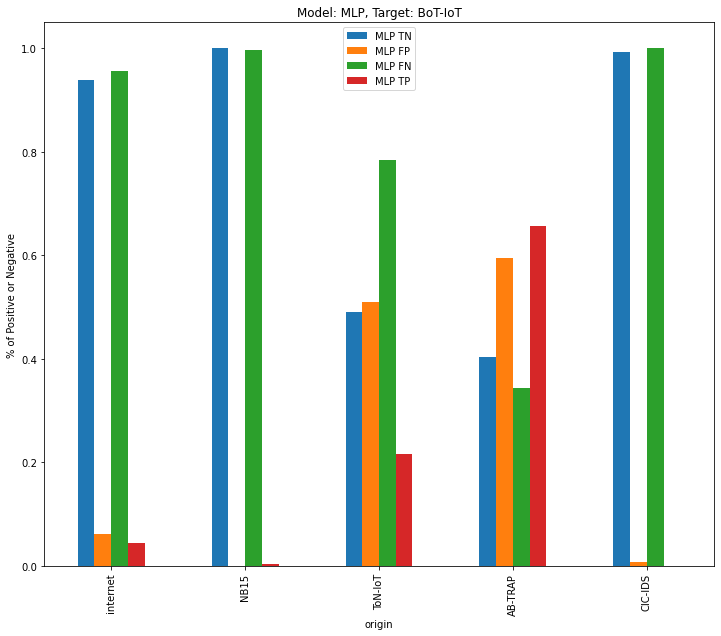

<Figure size 864x720 with 0 Axes>

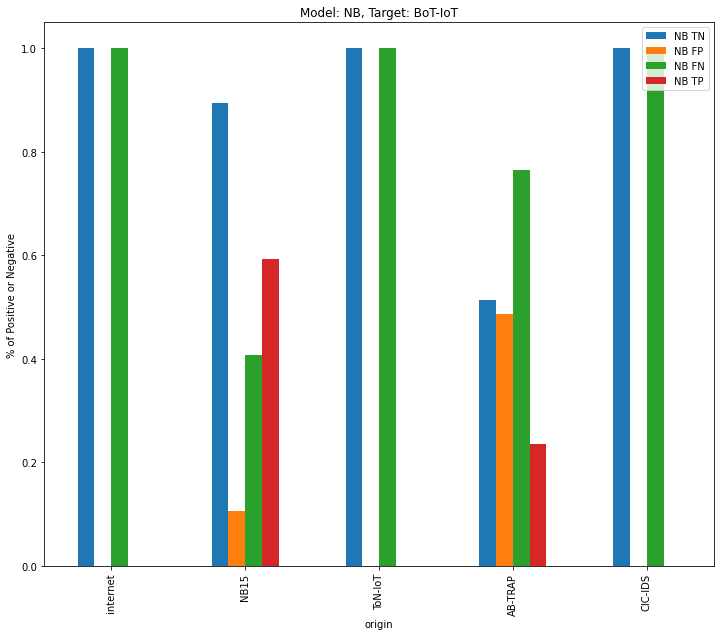

<Figure size 864x720 with 0 Axes>

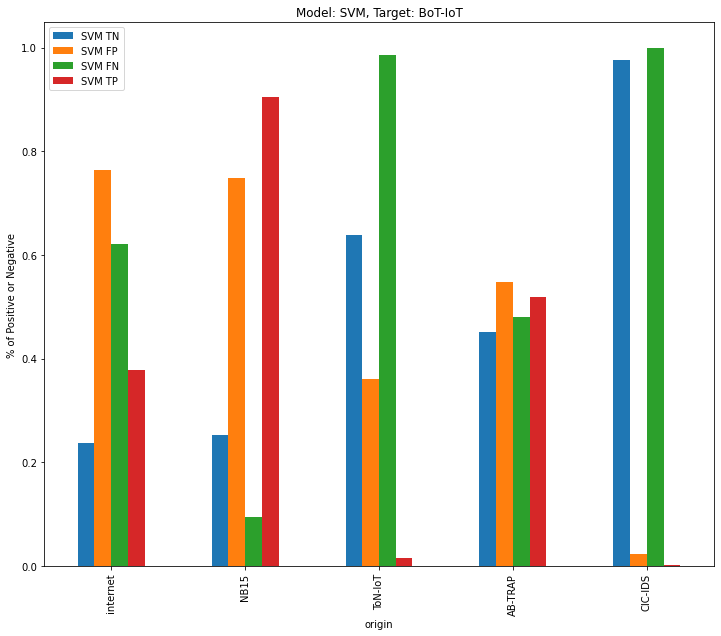

<Figure size 864x720 with 0 Axes>

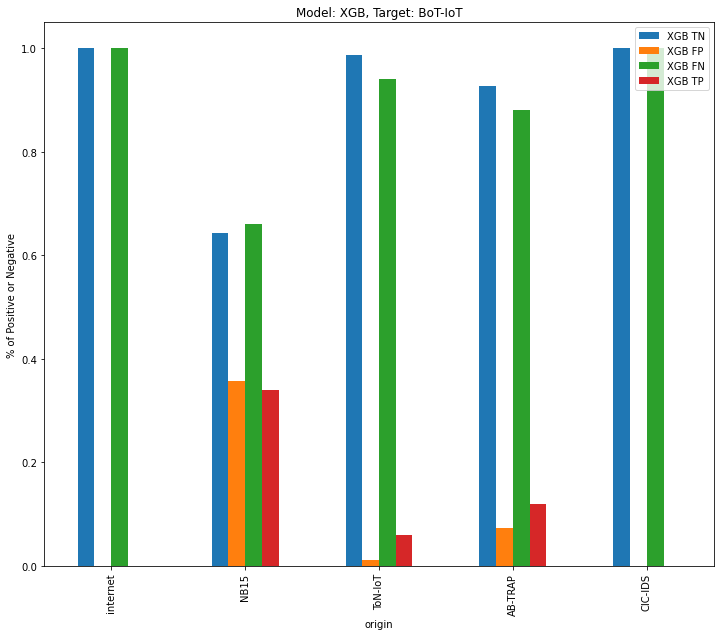

<Figure size 864x720 with 0 Axes>

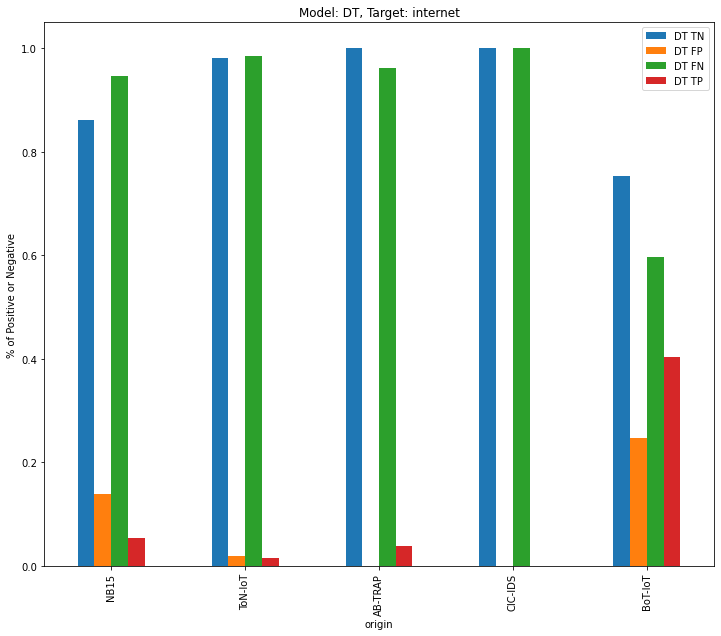

<Figure size 864x720 with 0 Axes>

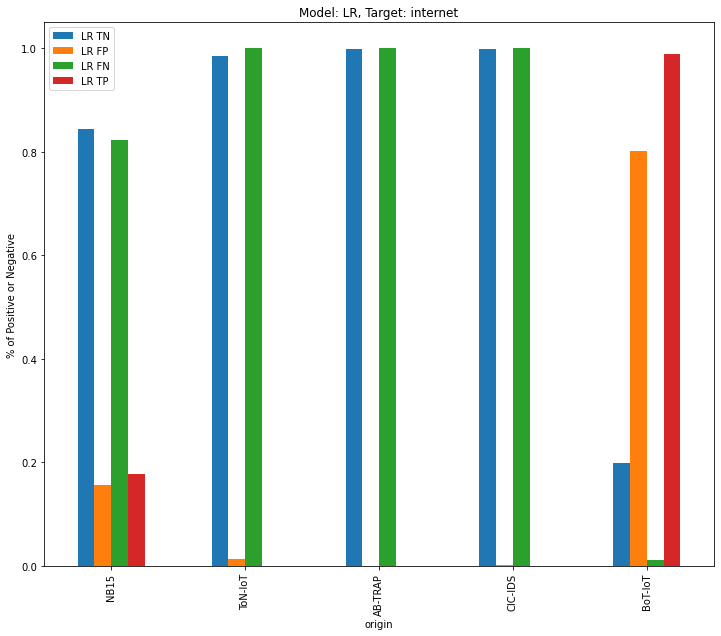

<Figure size 864x720 with 0 Axes>

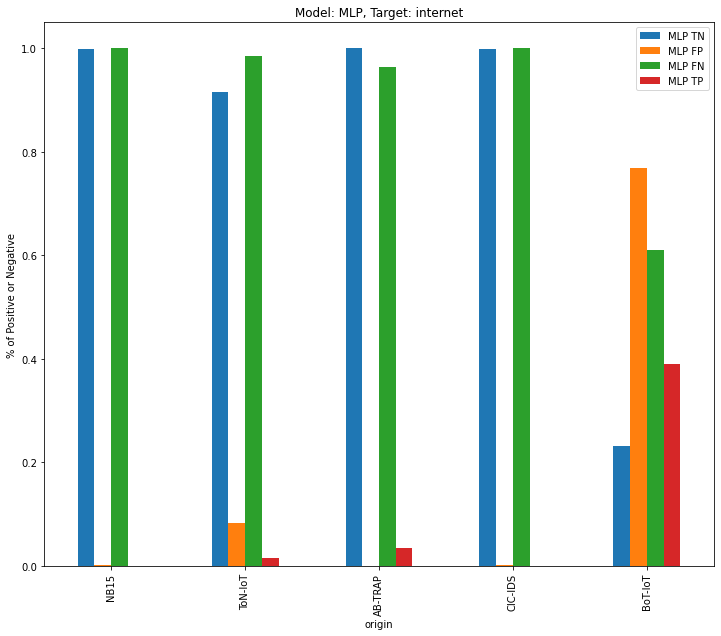

<Figure size 864x720 with 0 Axes>

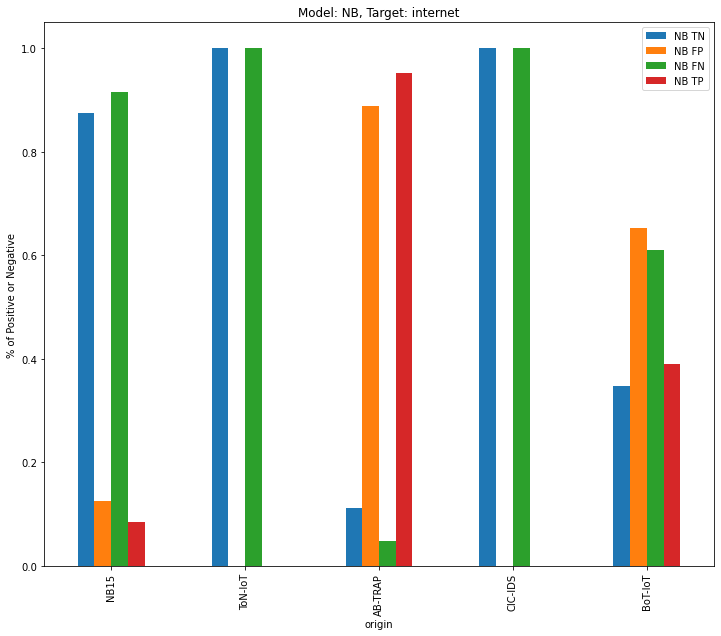

<Figure size 864x720 with 0 Axes>

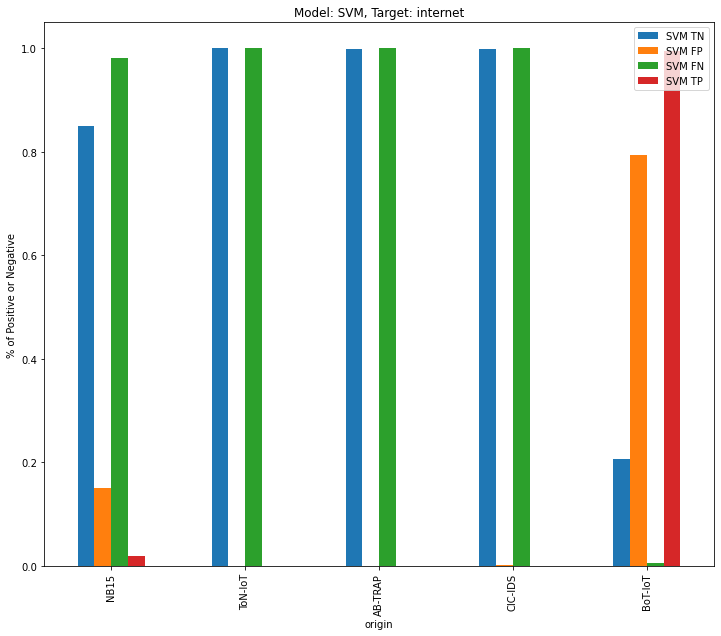

<Figure size 864x720 with 0 Axes>

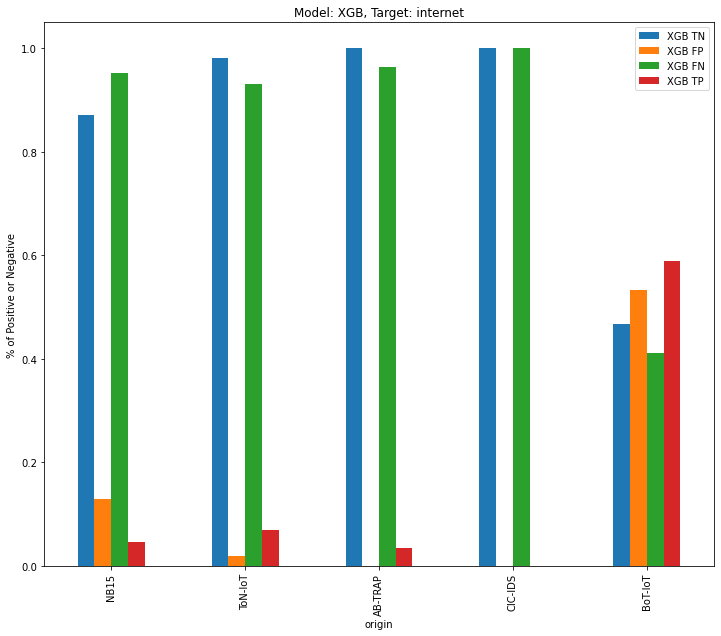

In [8]:
# Target: BoT-IoT
# Origin    models
#-------    ----------------
# AB-TRAP   MLP SVM
# internet  SVM
# ton-iot   LR
# NB15      DT LR NB SVM XGB

size = (12, 10)
for line in setInfo.itertuples():
    g1 = data[data['target'].apply(lambda x: x.split("_")[1])==line[0]].copy()
    
    g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
    g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
    

    for x in range(0,g1.shape[1]-5,4):
        fig = plt.figure(figsize=(12,10))
        MLname = g1.columns[1+x].split(" ")[0]
        cols = list(range(1+x,5+x))
        cols.extend([g1.shape[1]-1,0])
        g2 = g1.iloc[:,cols]
        g2.plot(x="origin", figsize=size, kind="bar", stacked=False, title="Model: {0}, Target: {1}".format(MLname,line[0])) # Machine {1} tested on {0}".format(line[0],MLname)
        plt.ylabel('% of Positive or Negative')
        #fig.suptitle("Target: {0}".format(line[0]), fontsize=32)
        #fig.tight_layout()
        plt.savefig("./dissertation/individuals/target_{0}_confusion_{1}.jpg".format(line[0], MLname), bbox_inches="tight")
        plt.close()
    #fig.subplots_adjust(top=0.9)
    

### Graphs Confusion Matrix per ML and target

<ipython-input-11-21645dae5f1a>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axis = plt.subplot(2,3,1+x/4)


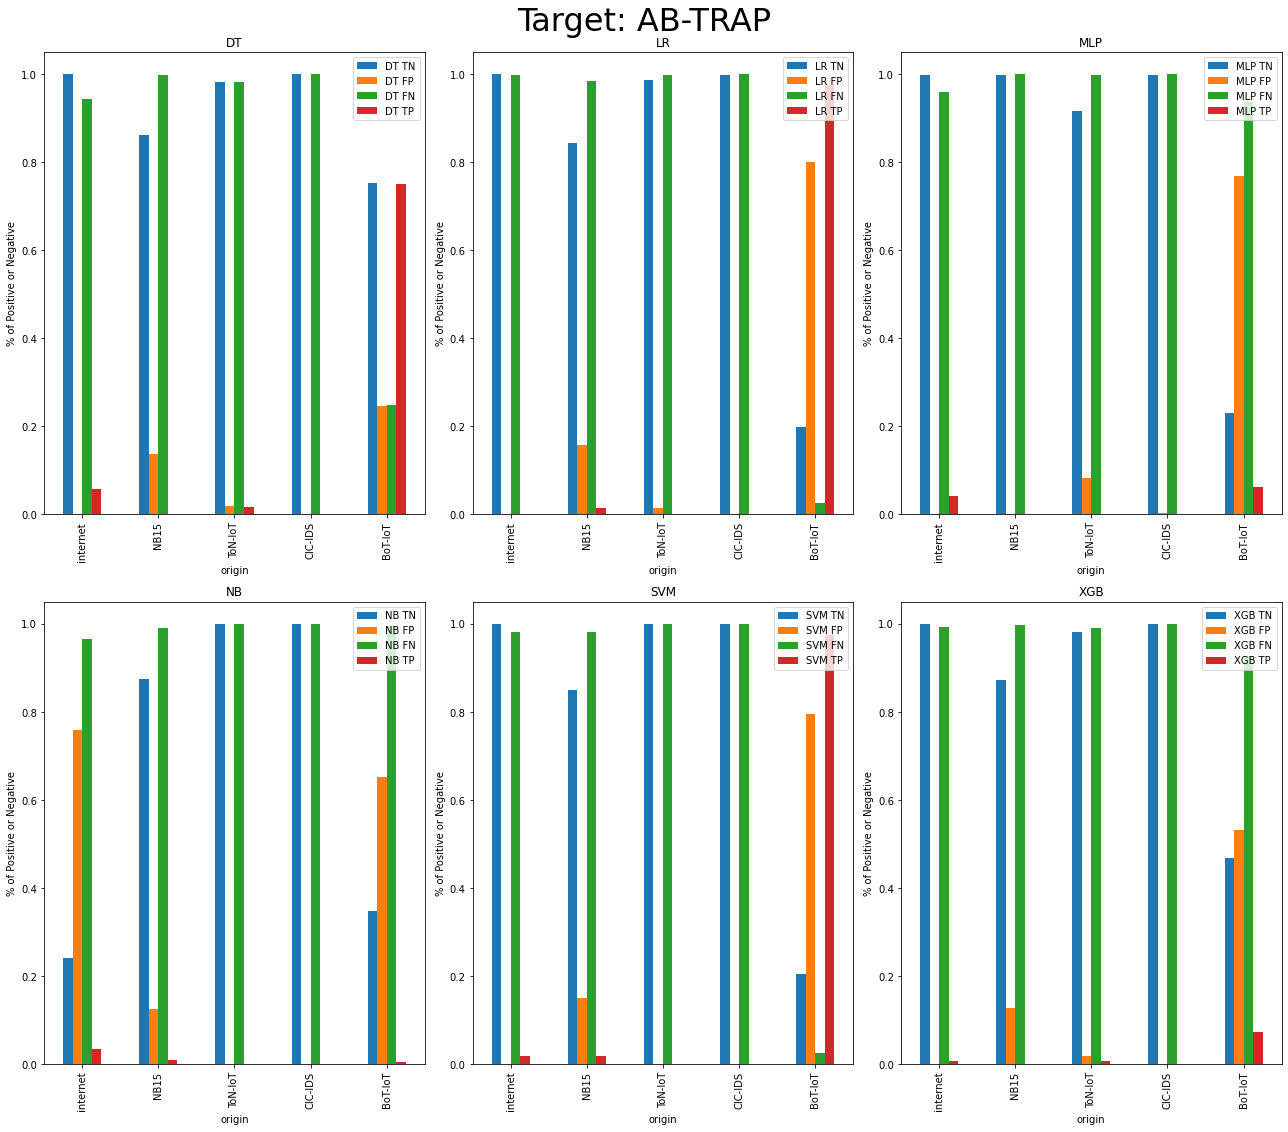

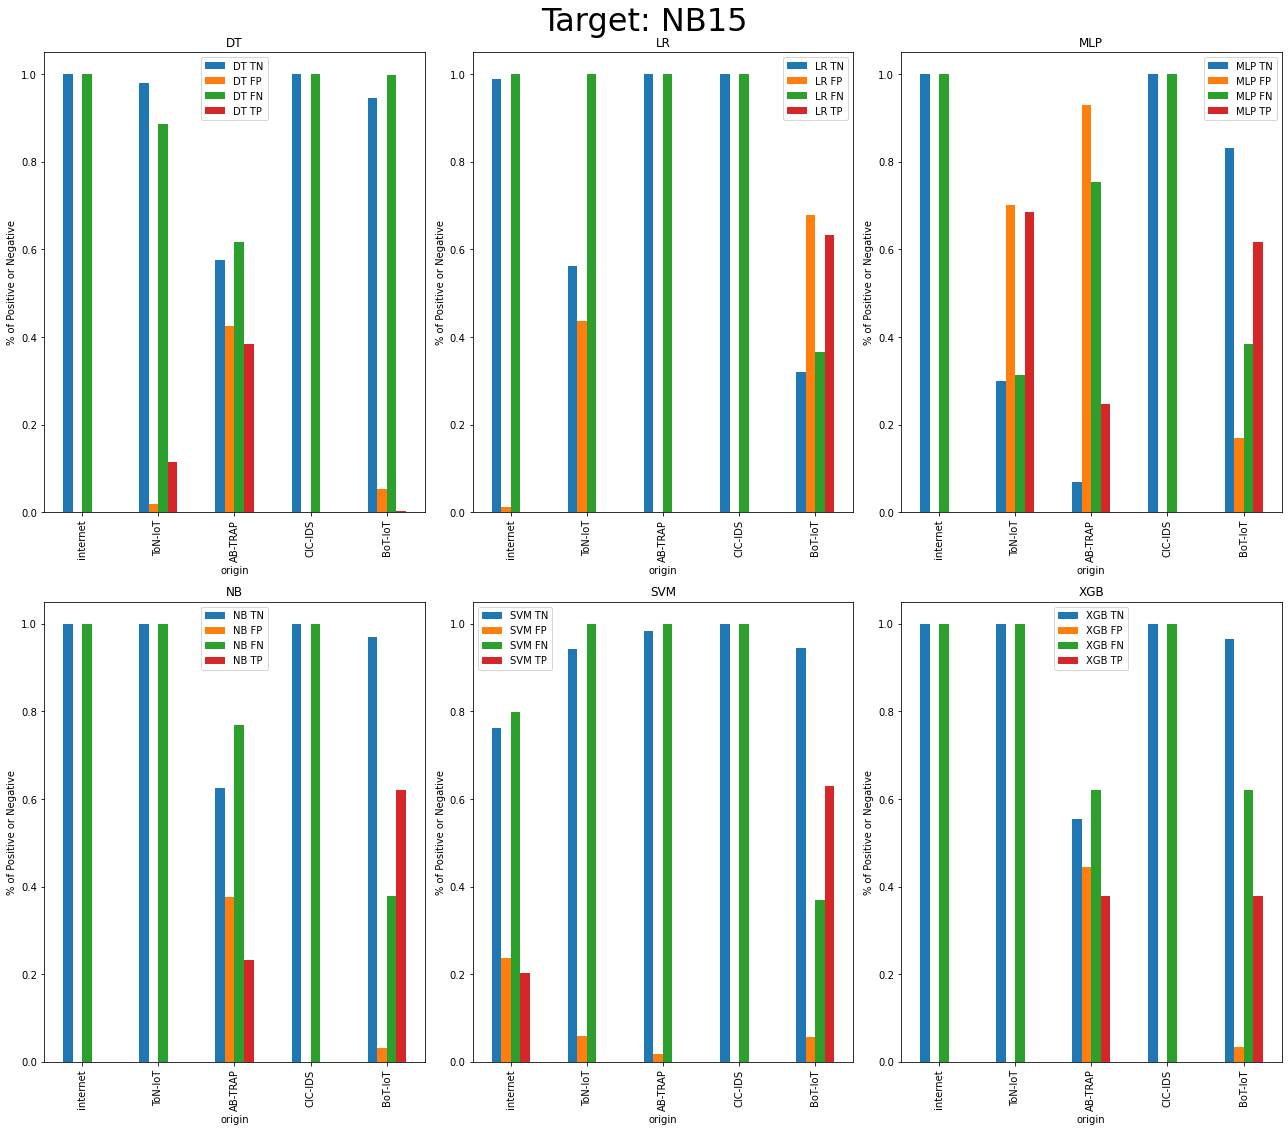

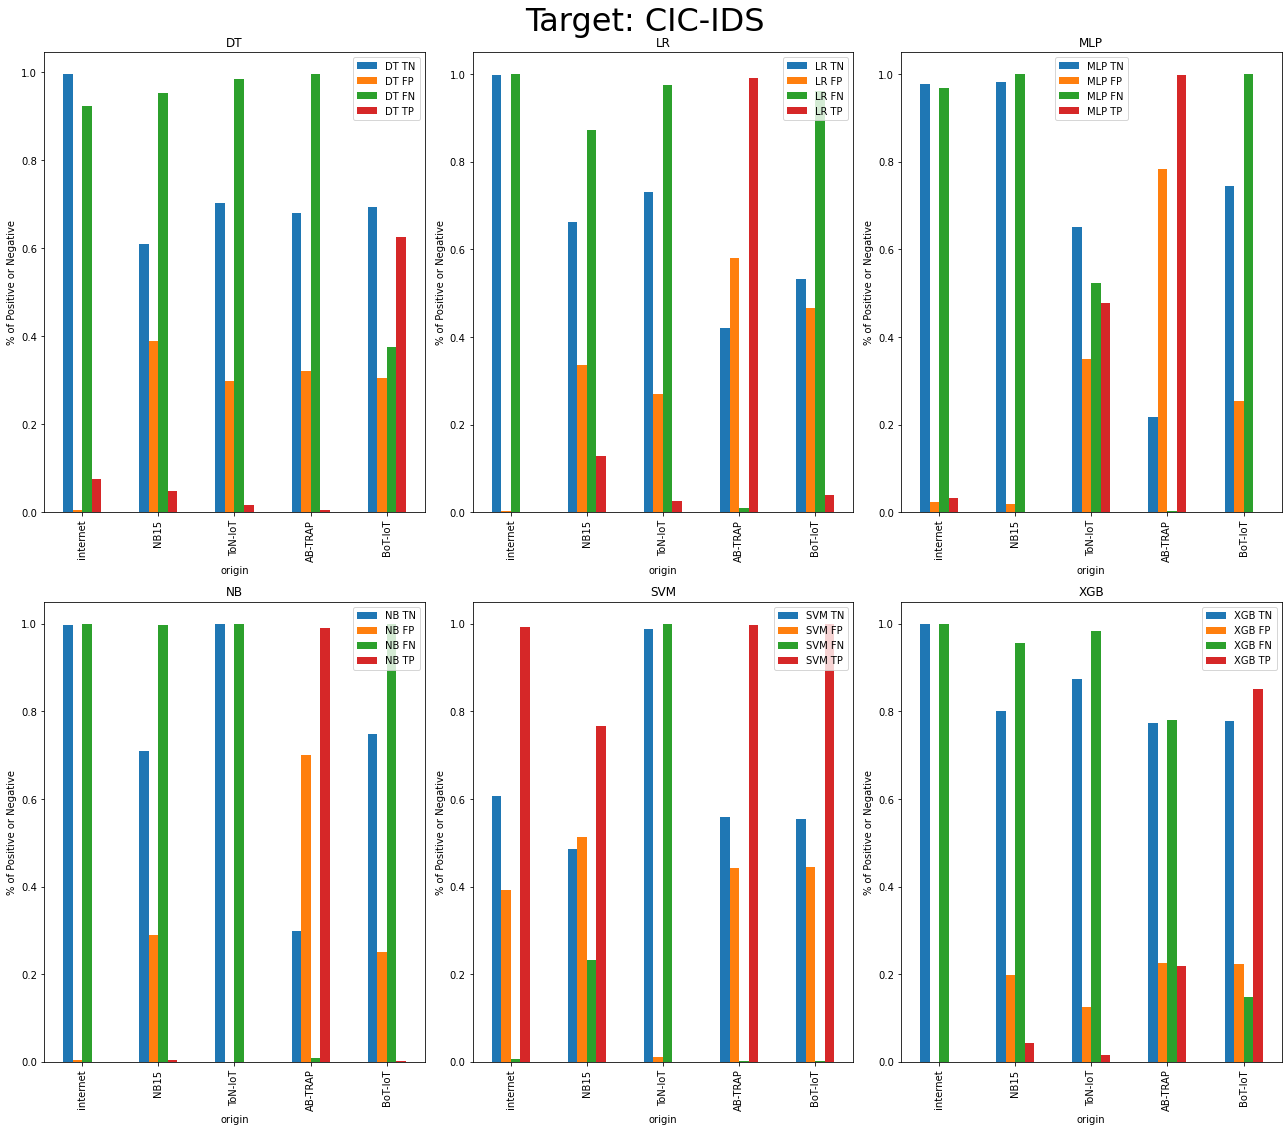

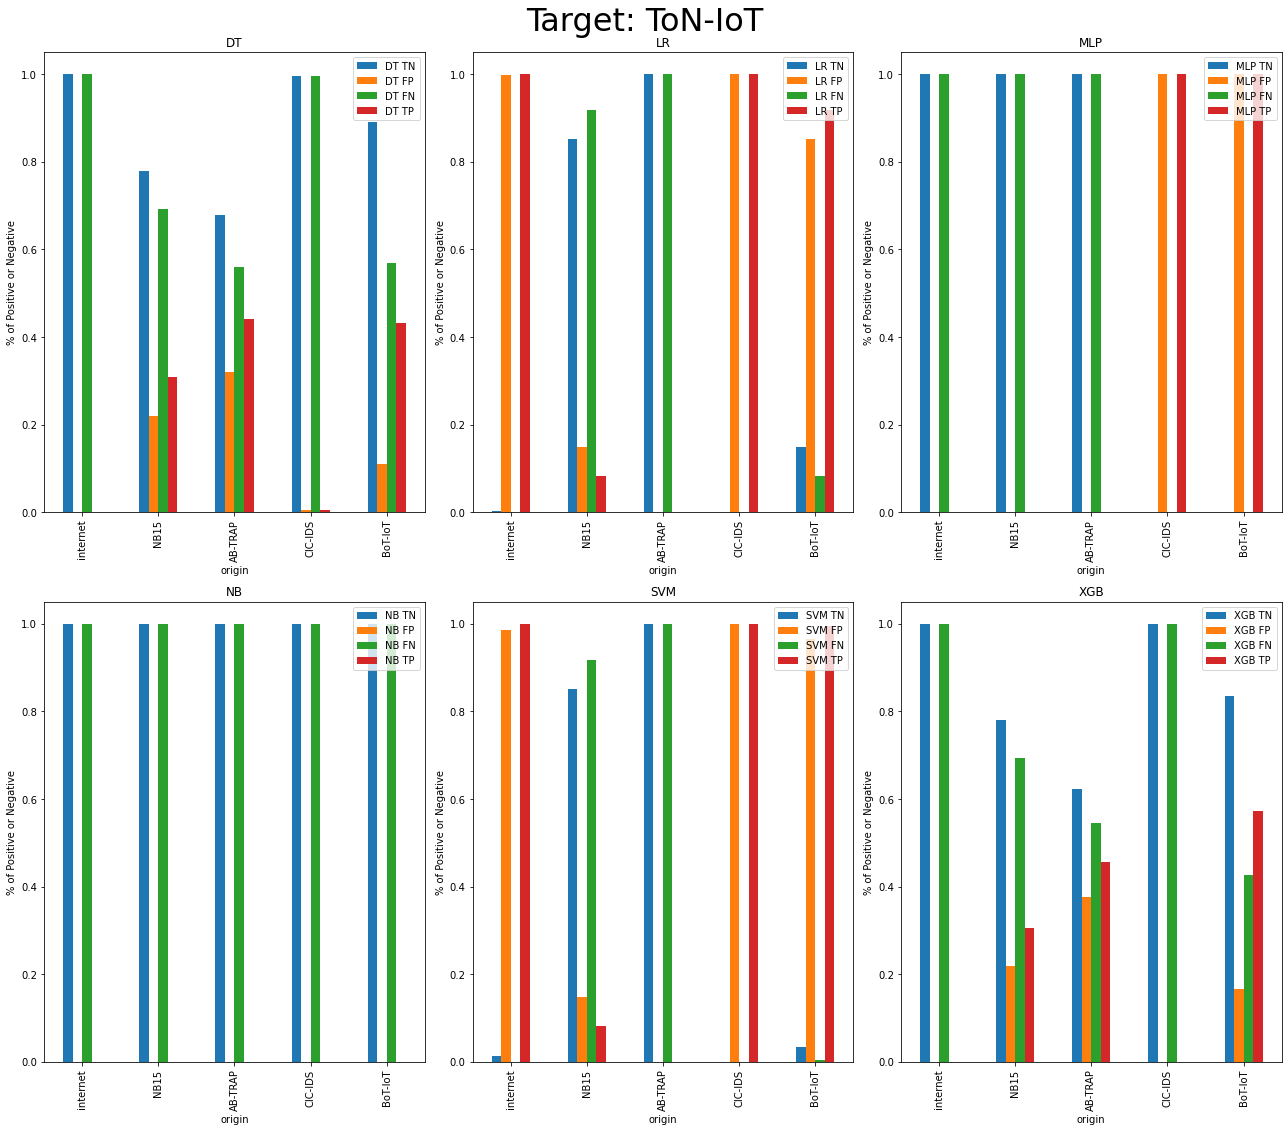

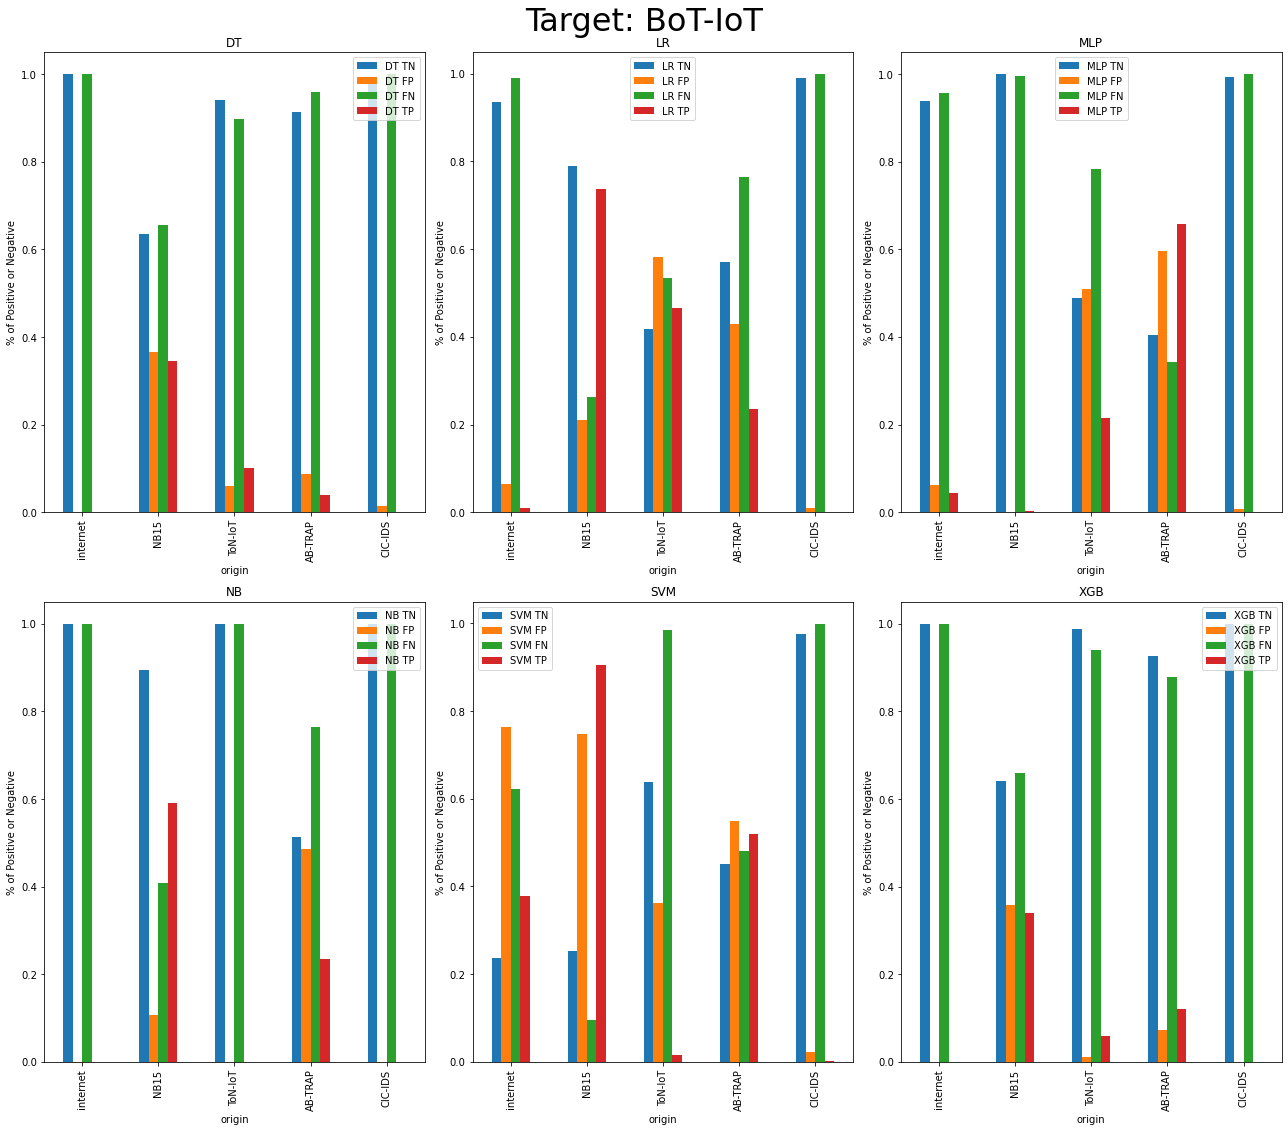

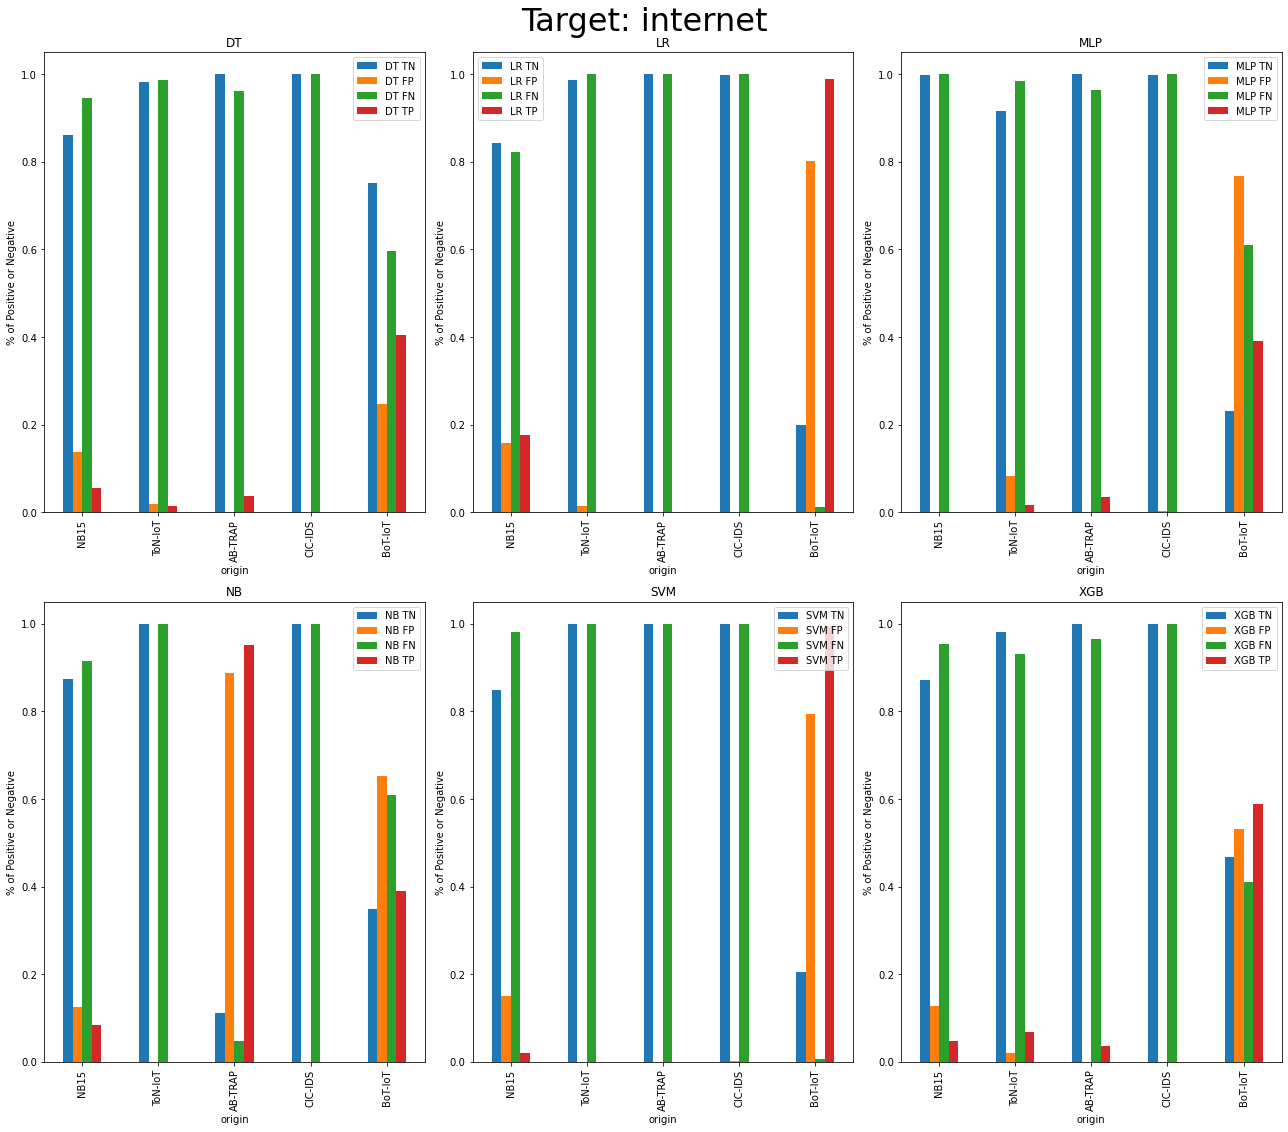

In [11]:
size = (18, 16)
for line in setInfo.itertuples():
    g1 = data[data['target'].apply(lambda x: x.split("_")[1])==line[0]].copy()
    
    g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
    g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
    fig = plt.figure(figsize=(12,10))

    for x in range(0,g1.shape[1]-5,4):
        MLname = g1.columns[1+x].split(" ")[0]
        cols = list(range(1+x,5+x))
        cols.extend([g1.shape[1]-1,0])
        g2 = g1.iloc[:,cols]
        axis = plt.subplot(2,3,1+x/4)
        axis.set(ylabel='% of Positive or Negative')
        g2.plot(x="origin", ax=axis, figsize=size, kind="bar", stacked=False, title=MLname) # Machine {1} tested on {0}".format(line[0],MLname)
    
    fig.suptitle("Target: {0}".format(line[0]), fontsize=32)
    fig.tight_layout()
    plt.savefig("./dissertation/target_{0}_confusion.jpg".format(line[0]), bbox_inches="tight")
    #fig.subplots_adjust(top=0.9)
    

### Graphs ML f-score per target

<ipython-input-7-89fa4bf91648>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
<ipython-input-7-89fa4bf91648>:12: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: 2 * x["{0} Precision".format(MLname)] * x["{0} Recall".format(MLname)] / (x["{0} Precision".format(MLname)] + x["{0} Recall".format(MLname)]), axis=1)


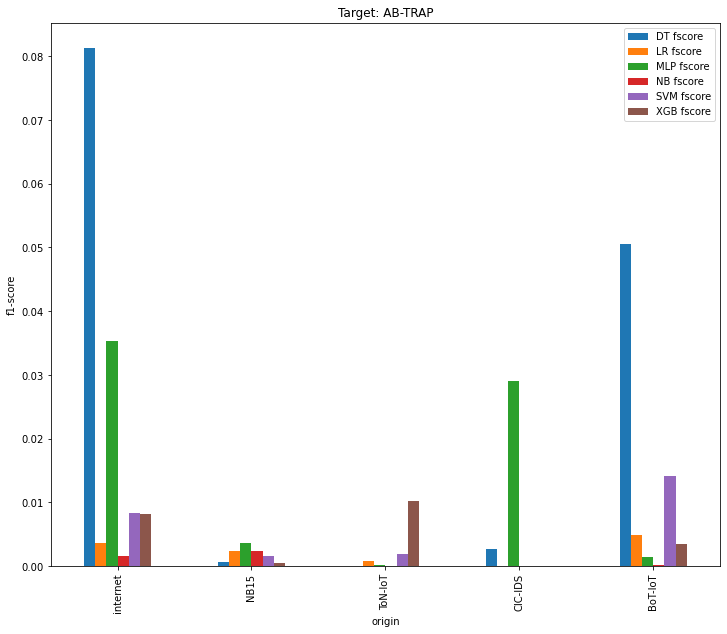

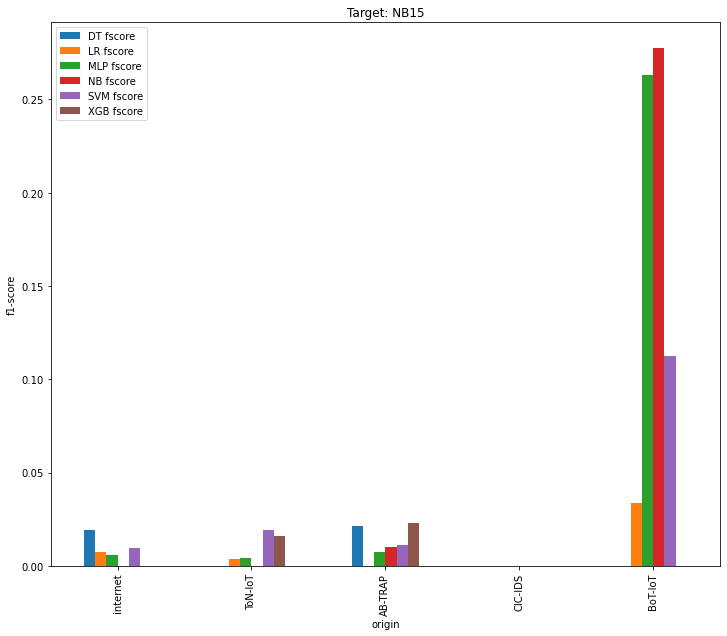

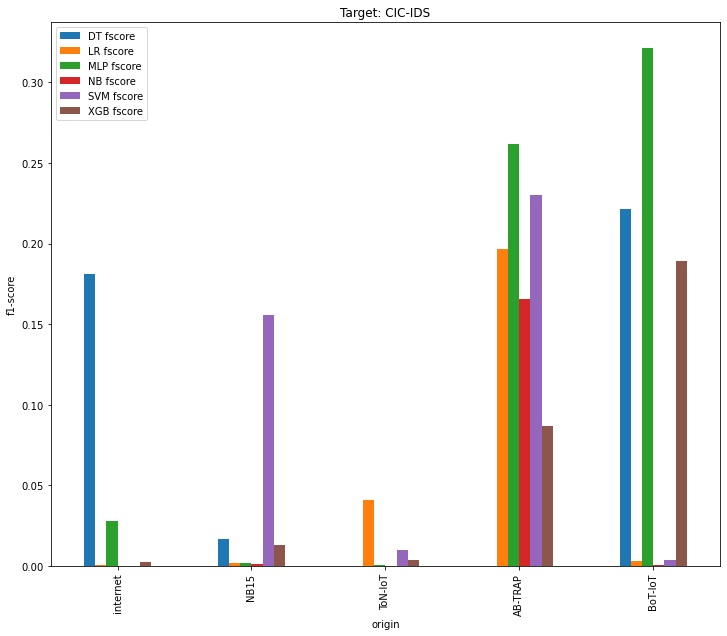

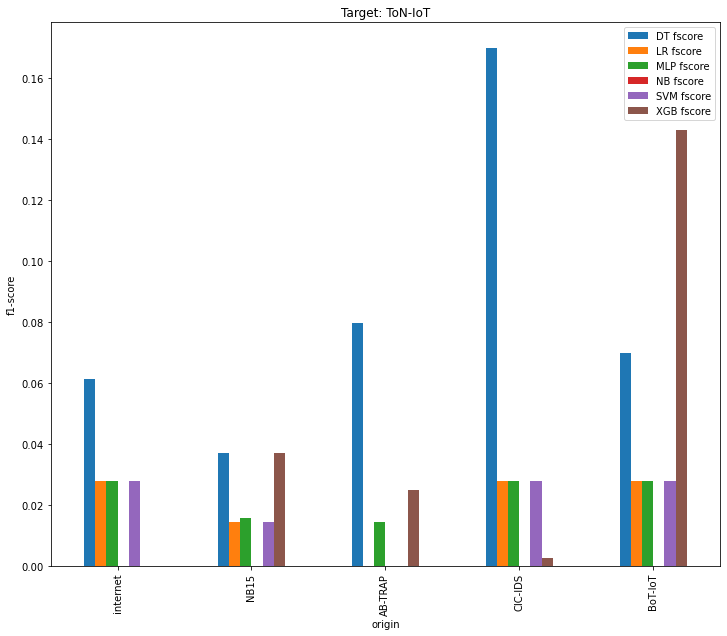

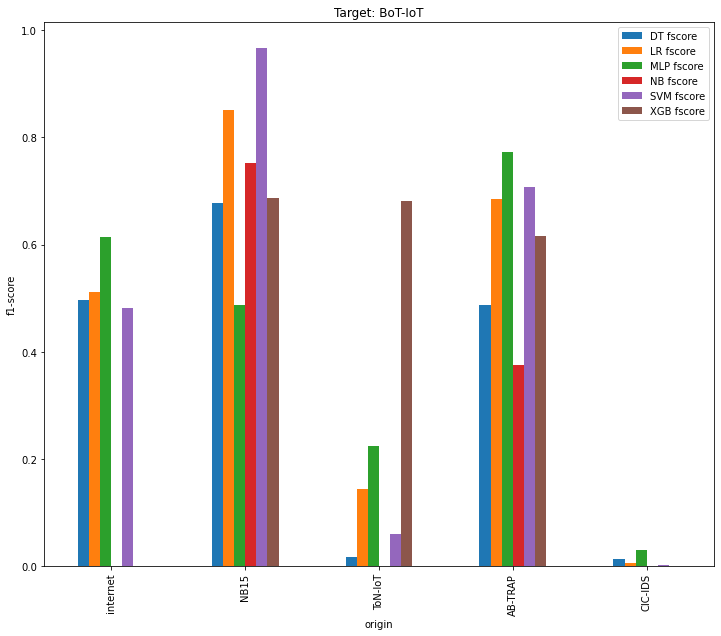

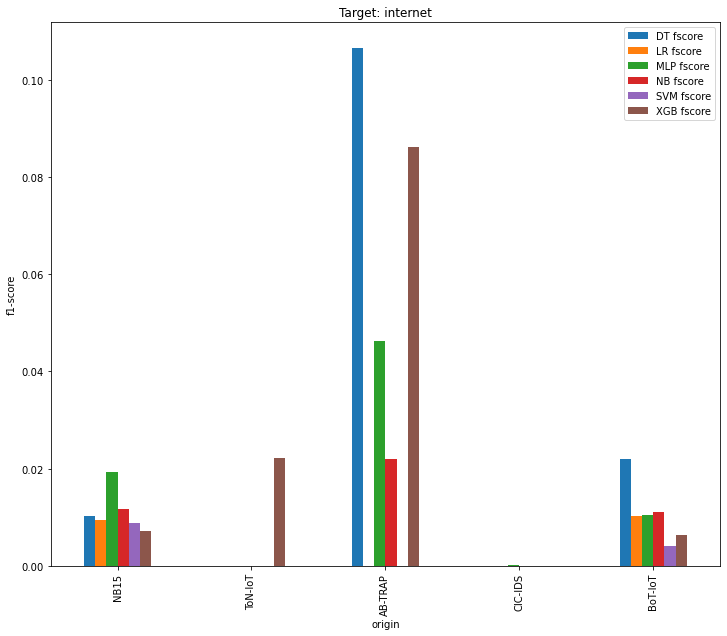

In [7]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
    g1["{0} Precision".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FP".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
    g1["{0} Recall".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FN".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FN".format(MLname)]), axis=1)
    g1["{0} fscore".format(MLname)] = g1[["{0} Precision".format(MLname), "{0} Recall".format(MLname)]].apply( 
        lambda x: 2 * x["{0} Precision".format(MLname)] * x["{0} Recall".format(MLname)] / (x["{0} Precision".format(MLname)] + x["{0} Recall".format(MLname)]), axis=1)
    g1.fillna(value={"{0} fscore".format(MLname):0, "{0} Precision".format(MLname):0, "{0} Recall".format(MLname):0}, inplace=True)
    #cols = list(range(1+x,5+x))
    #cols.extend([g1.shape[1]-1,0])
for line in setInfo.itertuples():
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "fscore" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", kind='bar', figsize=size, stacked=False, title="Target: {0}".format(line[0]))
    plt.ylabel("f1-score")
    plt.savefig("./dissertation/fscore_us_{0}.jpg".format(line[0]), bbox_inches="tight")

### Graphs ML per target

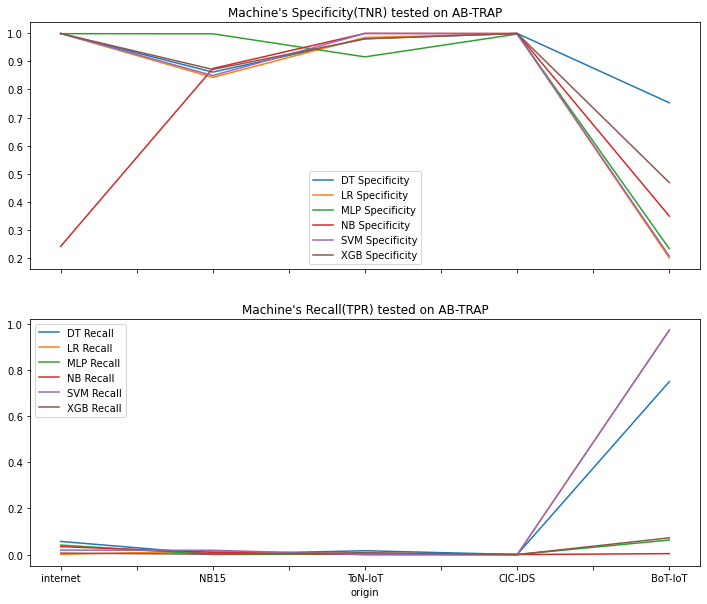

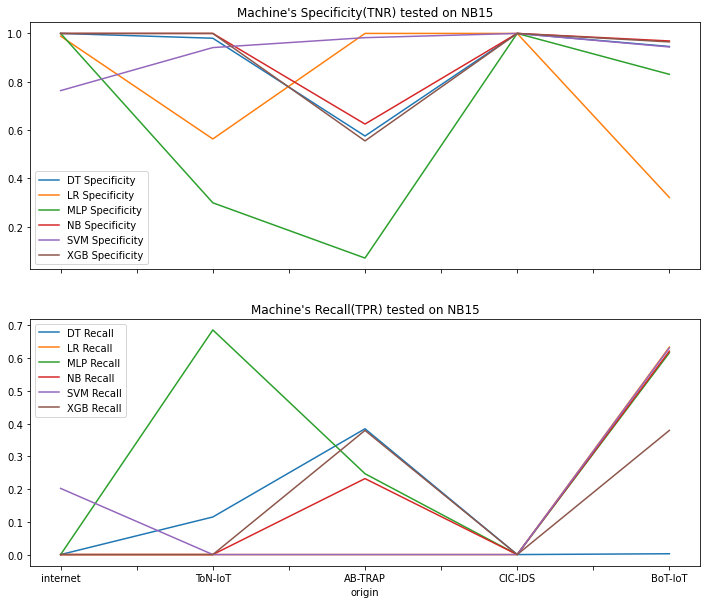

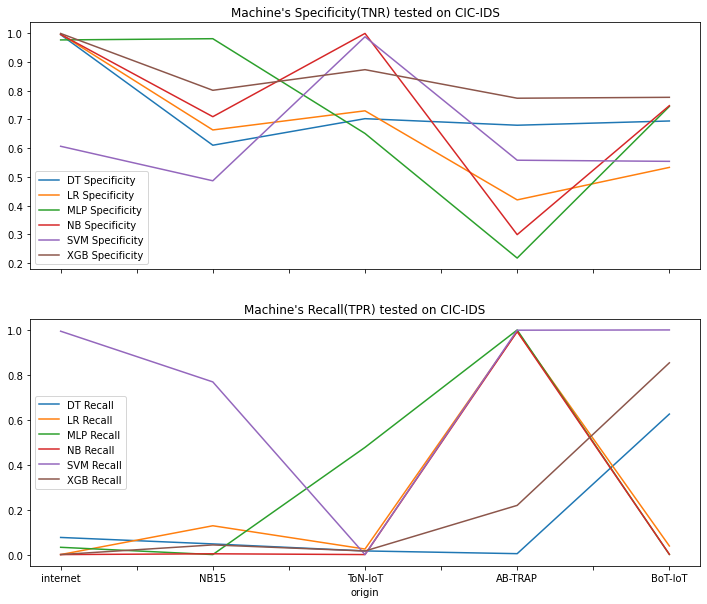

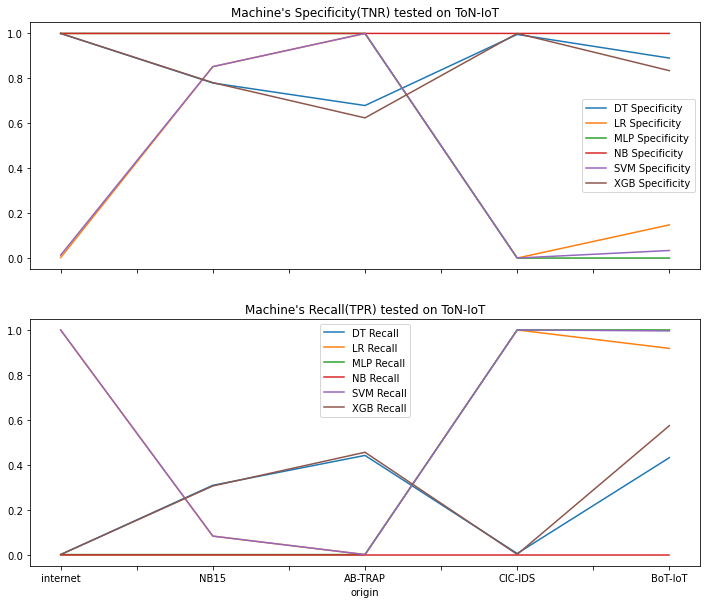

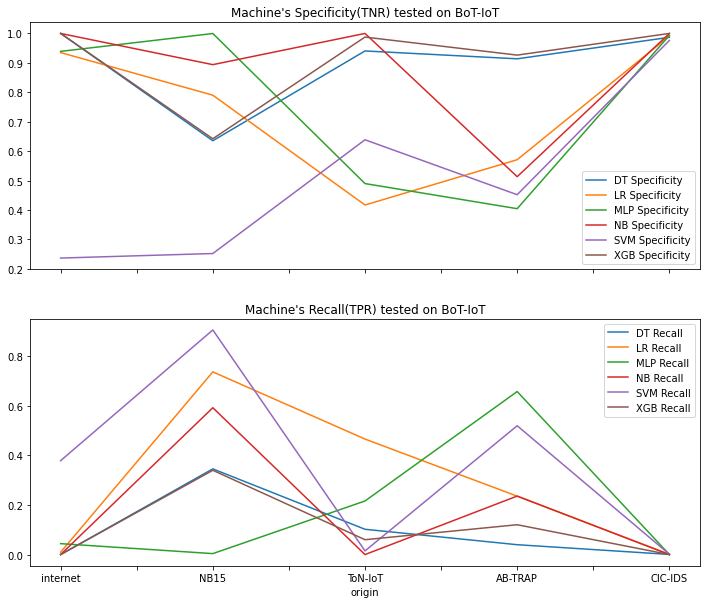

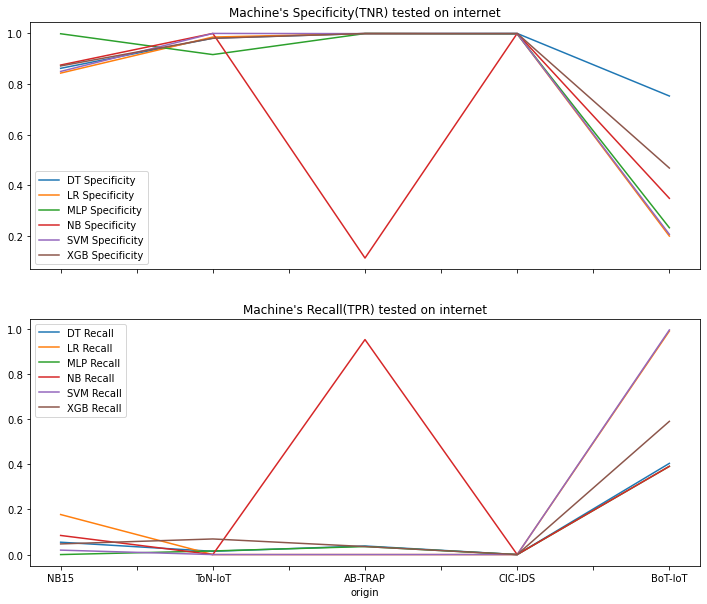

In [6]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
    g1["{0} Specificity".format(MLname)] = g1[["{0} TN".format(MLname), "{0} FP".format(MLname)]].apply( 
        lambda x: x["{0} TN".format(MLname)]/(x["{0} TN".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
    g1["{0} Recall".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FN".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FN".format(MLname)]), axis=1)
    g1.fillna(value={"{0} Specificity".format(MLname):0, "{0} Recall".format(MLname):0}, inplace=True)
    
for line in setInfo.itertuples():
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "Specificity" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", figsize=size, ax=axes[0], stacked=False, title="Machine\'s Specificity(TNR) tested on {0}".format(line[0]))
    
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "Recall" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", figsize=size, ax=axes[1], stacked=False, title="Machine\'s Recall(TPR) tested on {0}".format(line[0]))
        

In [29]:
for x in range(0,data.shape[1]-1,4):
    g1 = data.iloc[:,range(0+x,4+x)]
    #print(g1.head(1))
    for o in data.index.unique():
        data[data['target']==o].plot(x="origin", kind="bar", stacked=False, title="Machine trained with {0}".format(o))
       # plt.savefig("./ML-output/results_{0}.jpg".format(o), dpi=300, bbox_inches="tight")

               DT TN  DT FP  DT FN  DT TP
target                                   
SCAN_NB15_CIC  21093  15582    247    154
               LR TN  LR FP  LR FN  LR TP
target                                   
SCAN_NB15_CIC  36675      0    401      0
               MLP TN  MLP FP  MLP FN  MLP TP
target                                       
SCAN_NB15_CIC    2553   34122     302      99
                 NB TN    NB FP  NB FN  NB TP
target                                       
SCAN_NB15_CIC  22910.0  13765.0  308.0   93.0
                SVM TN  SVM FP  SVM FN  SVM TP
target                                        
SCAN_NB15_CIC  36033.0   642.0   401.0     0.0
                XGB TN   XGB FP  XGB FN  XGB TP
target                                         
SCAN_NB15_CIC  20350.0  16325.0   249.0   152.0


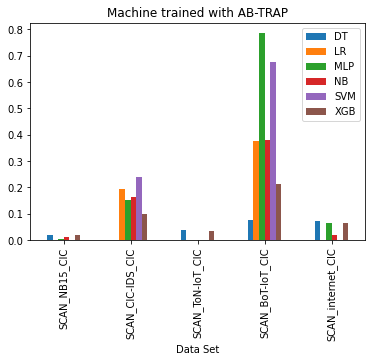

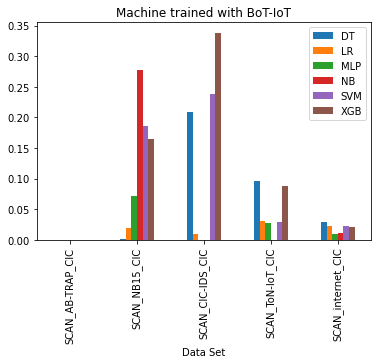

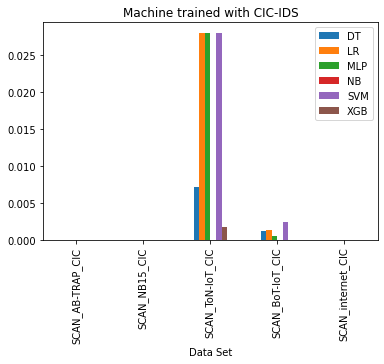

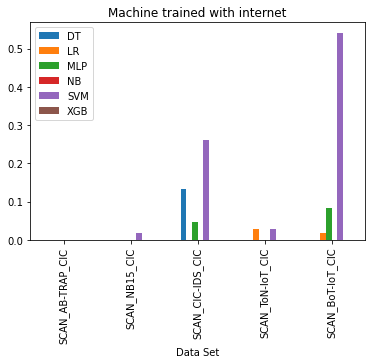

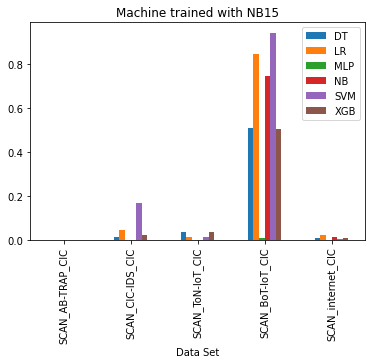

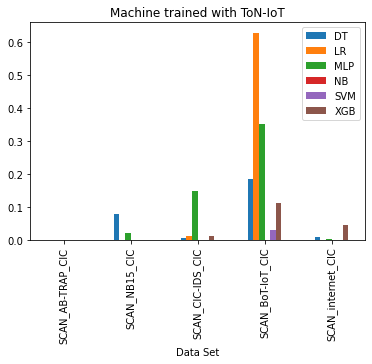

In [5]:
for o in data.origin.unique():
    data[data['origin']==o].plot(x="Data Set", kind="bar", stacked=False, title="Machine trained with {0}".format(o))
    plt.savefig("./ML-output/results_{0}.jpg".format(o), dpi=300, bbox_inches="tight")